<a href="https://colab.research.google.com/github/Avik-G/Telecom-Customer-Churn-Analysis/blob/main/Telecom_Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Churn Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import interp
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn import metrics, model_selection
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DS/EDA/Telecom Churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
df.shape

(3333, 20)

In [6]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
#Storing all continous variables in variable named col_name
col_name = df.columns[(df.dtypes=="float64")|(df.dtypes=="int64")].tolist()
print(col_name)

['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


In [8]:
#Storing all categorical var in cat_names and removing target var
cat_names = df.select_dtypes(exclude=np.number).columns.tolist()
cat_names.remove('Churn')
cat_names

['State', 'International plan', 'Voice mail plan']

In [9]:
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

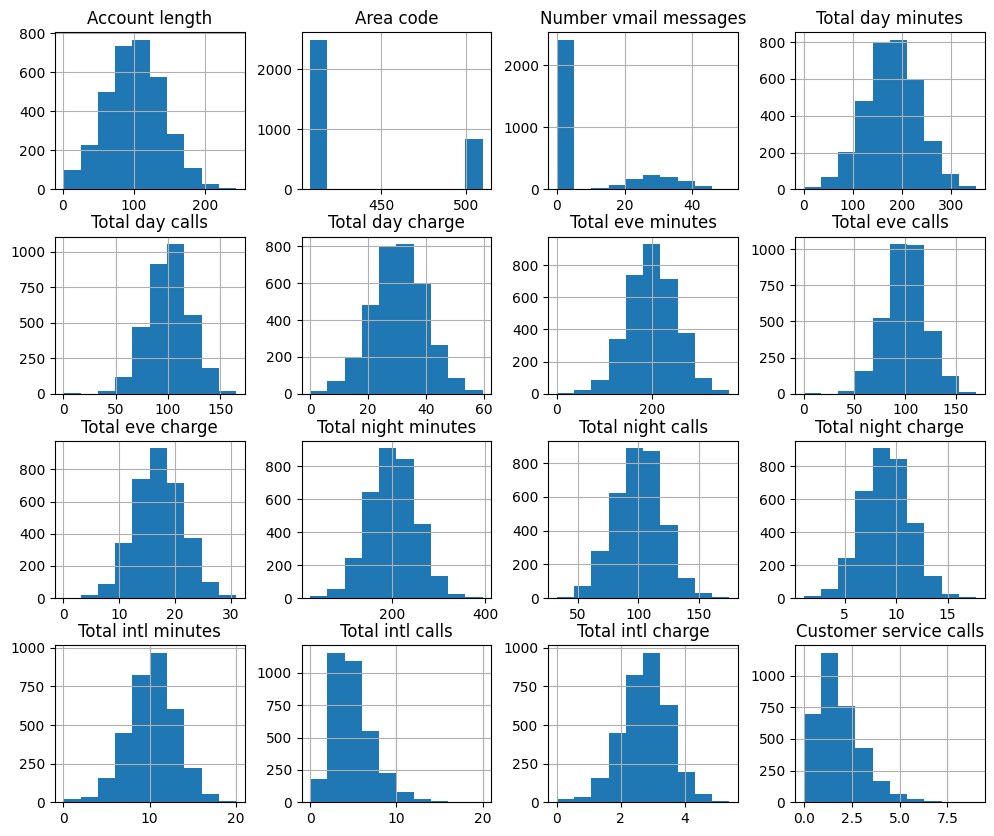

In [10]:
df.hist(figsize=(12, 10))
plt.show()

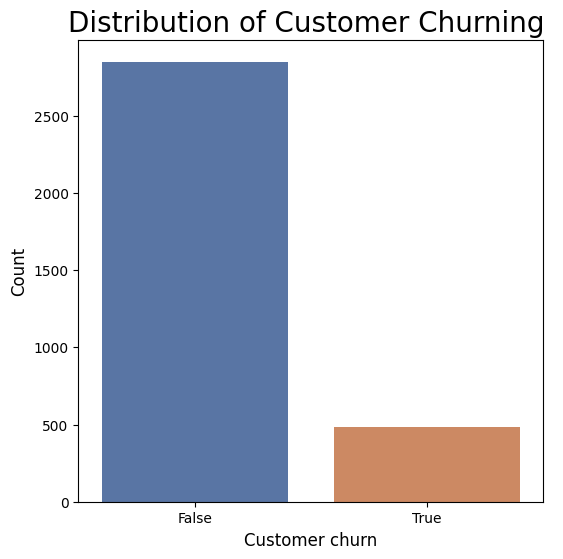

In [11]:
#Target Variable data distribution
plt.figure(figsize=(6,6))
sns.countplot(x = df.Churn,palette='deep')
plt.xlabel('Customer churn', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Customer Churning ",fontsize= 20)
plt.show()

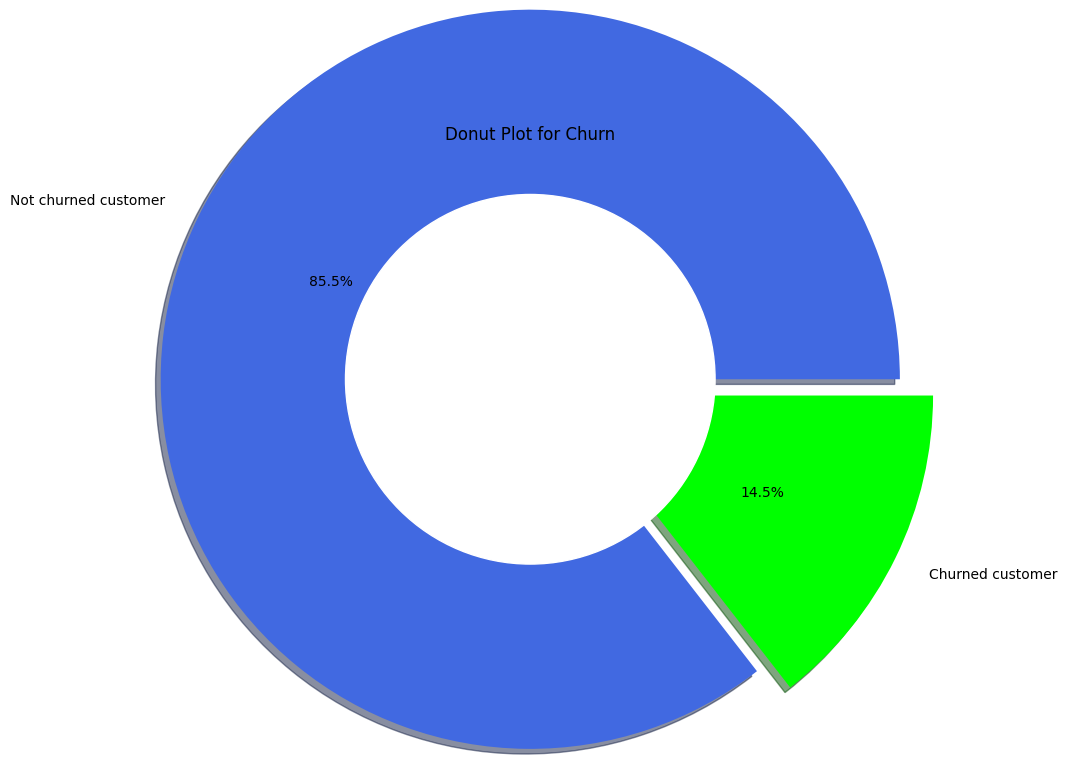

In [12]:
# Donut Plot to analyze churn
plt.figure(figsize=(6,6))
data = df['Churn'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['Not churned customer','Churned customer'],colors=['royalblue' ,'lime'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Churn')
plt.show()

<Axes: xlabel='State', ylabel='count'>

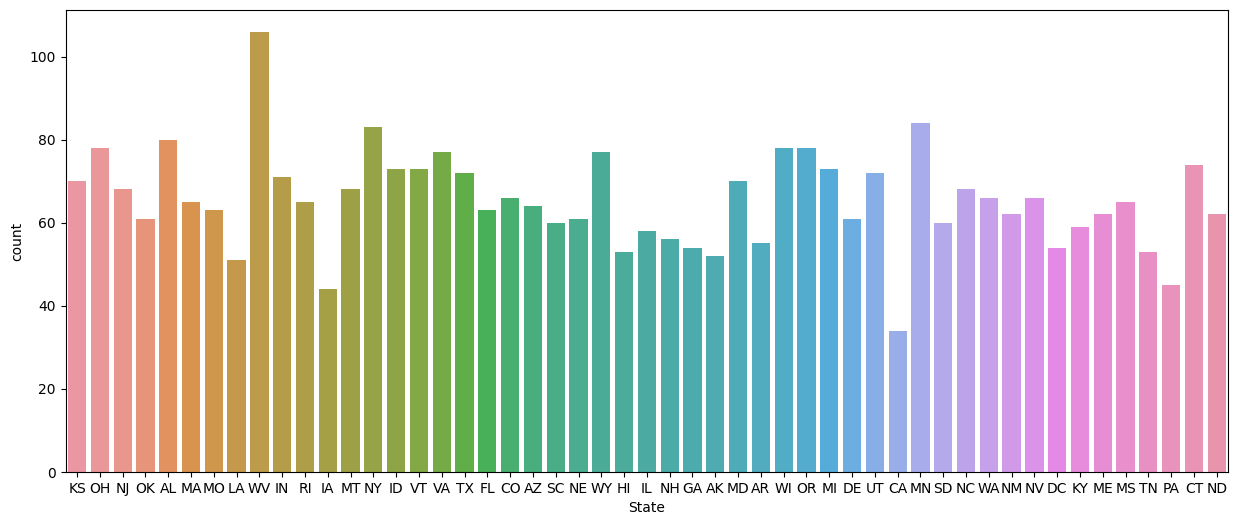

In [13]:
plt.rcParams['figure.figsize']=(15,6)
sns.countplot(x="State", data=df)

In [14]:
#Groupby --> size to represent ---> unstack the category
#train.groupby(["state", "Churn"]).size().unstack(level=-1).head()

#Relationational bar graph for checking data distribution with respect to target variable
def diff_bar(x,y):
    
    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

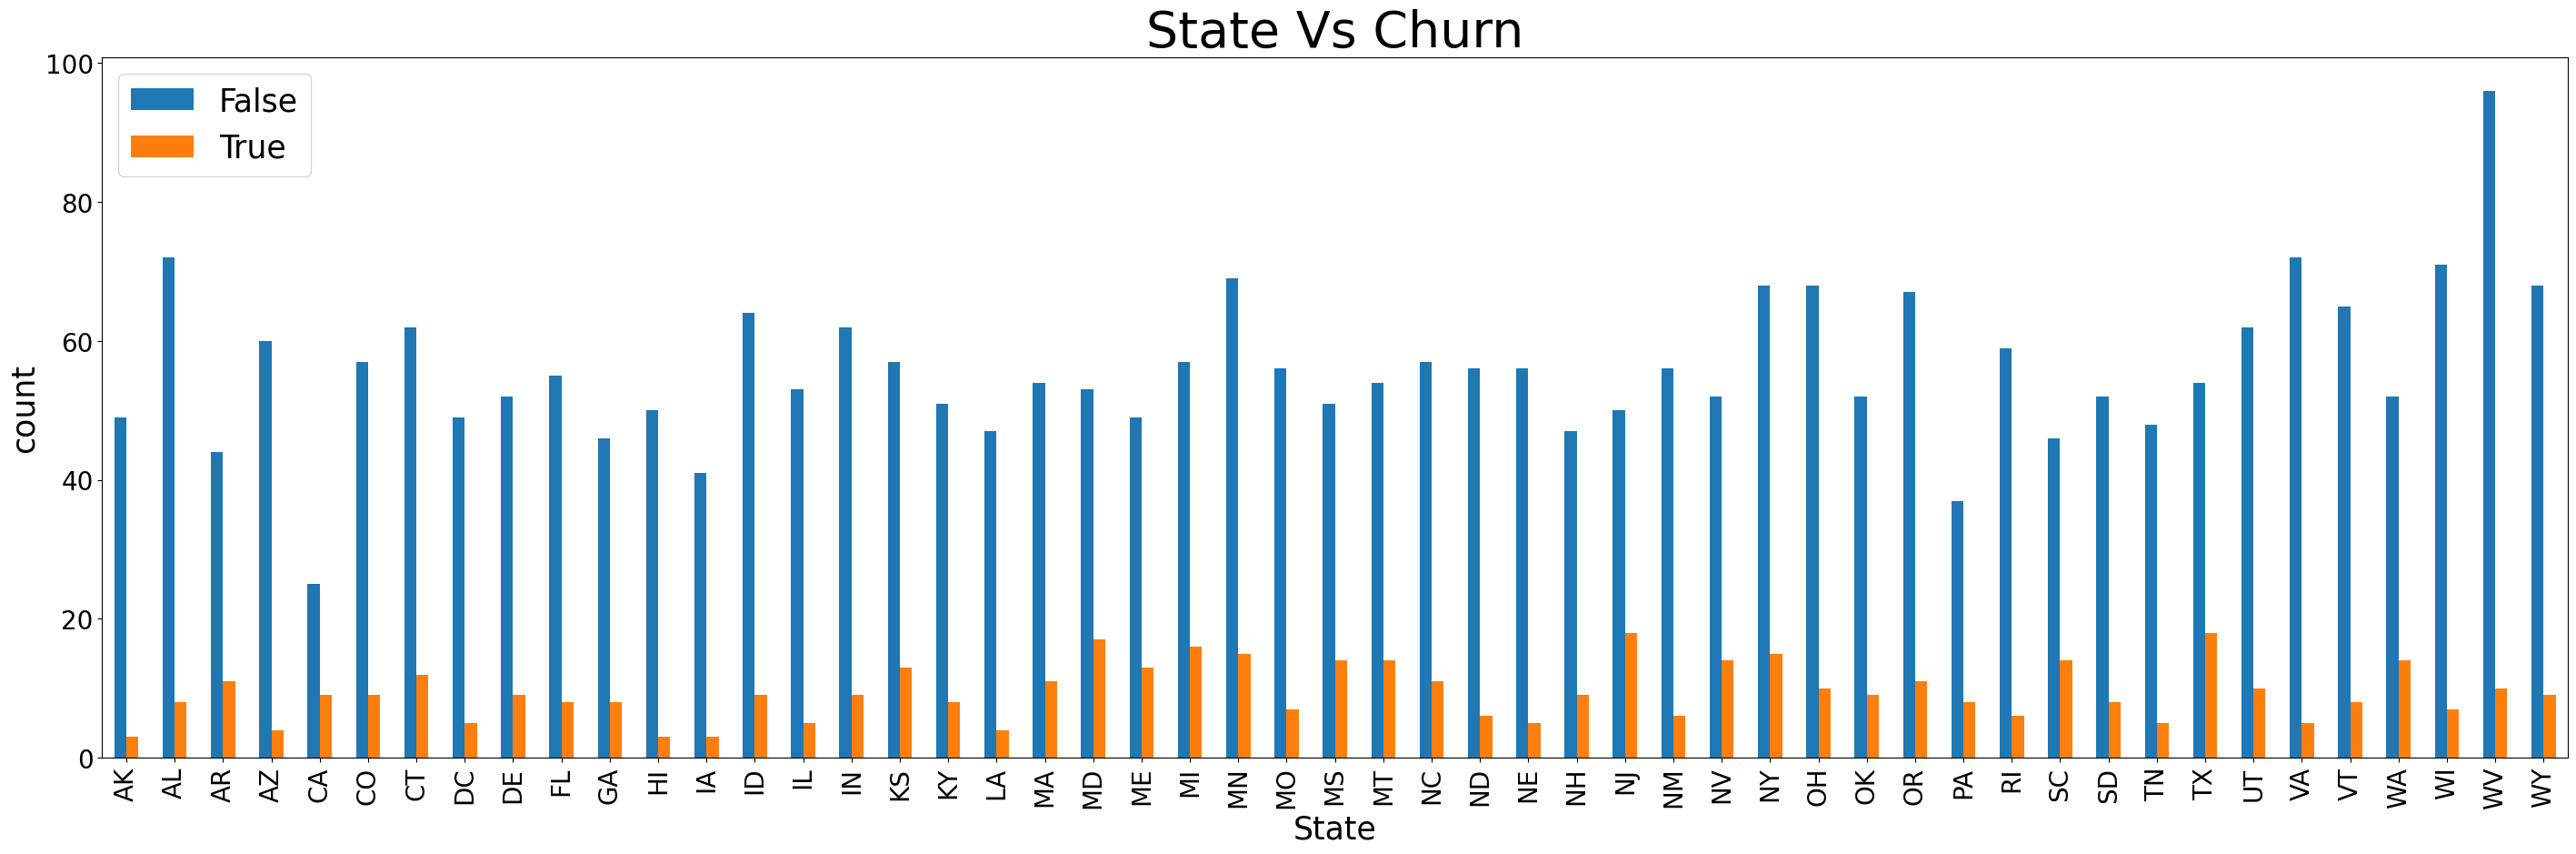

In [15]:
#State Wise Churning of customer
diff_bar('State','Churn')

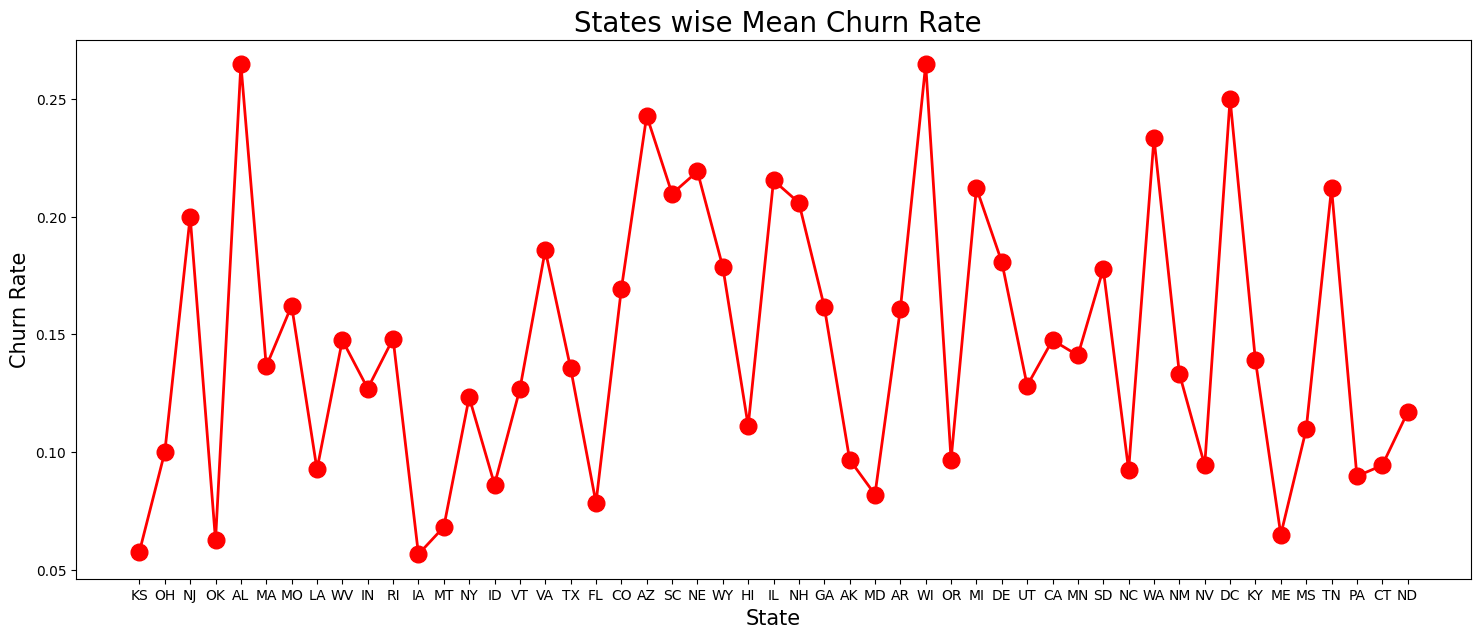

In [16]:
p1= df['State'].unique()
p2= df.groupby(['State'])['Churn'].mean()

plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(p1,p2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" States wise Mean Churn Rate", fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Churn Rate', fontsize = 15)
plt.show()

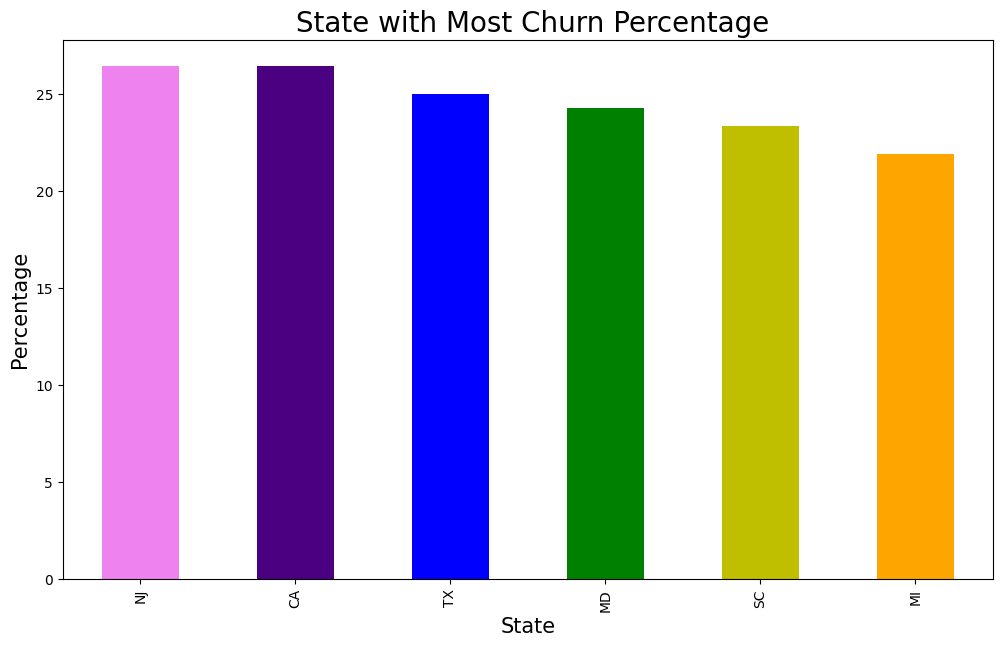

In [17]:
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with Most Churn Percentage", fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.show()

In [18]:
#calculate State vs Churn percentage
State_data = pd.crosstab(df["State"],df["Churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(State_data)

Churn  False  True  Percentage_Churn
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

In [19]:
#show the most churn state of top 10 by ascending the above list
df.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64


*There is 51 unique state present who have different churn rate.*

*From the above analysis CA, NJ, TX, MD, SC, MI are the ones who have a higher churn rate of more than 21.*

*The reason for this churn rate from a particular state may be due to the low coverage of the cellular network.*

In [20]:
#calculate Area code vs Churn percentage
Area_code_data = pd.crosstab(df["Area code"],df["Churn"])
Area_code_data['Percentage_Churn'] = Area_code_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Area_code_data)

Churn      False  True  Percentage_Churn
Area code                               
408          716   122         14.558473
415         1419   236         14.259819
510          715   125         14.880952


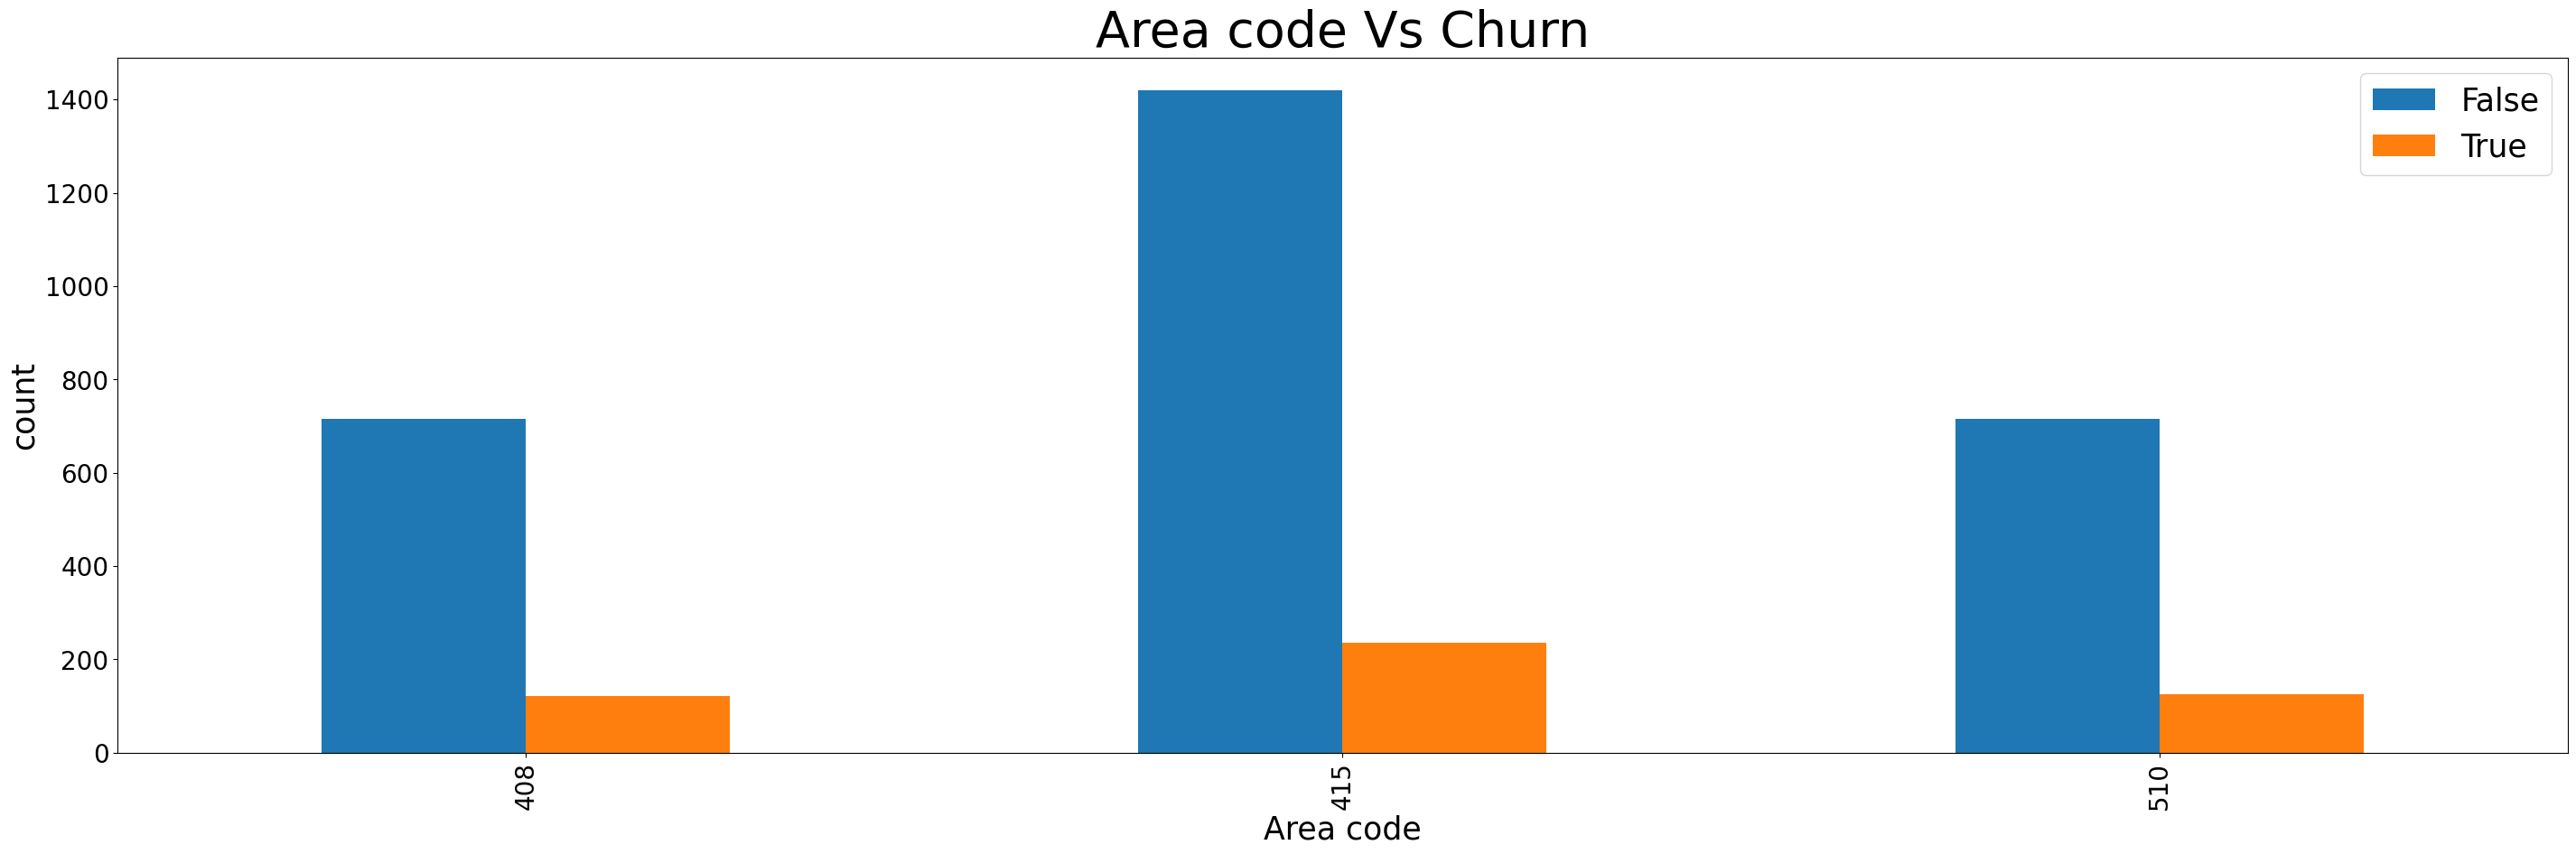

In [21]:
diff_bar('Area code','Churn')


*In the above data, we notice that there is only 3 unique value are there i.e408,415,510 and the churn rate of these area codes are almost same.*

*we don't think there is any kind of relation present between the "area code" and"churn" due to which the customer leaves the operator.*

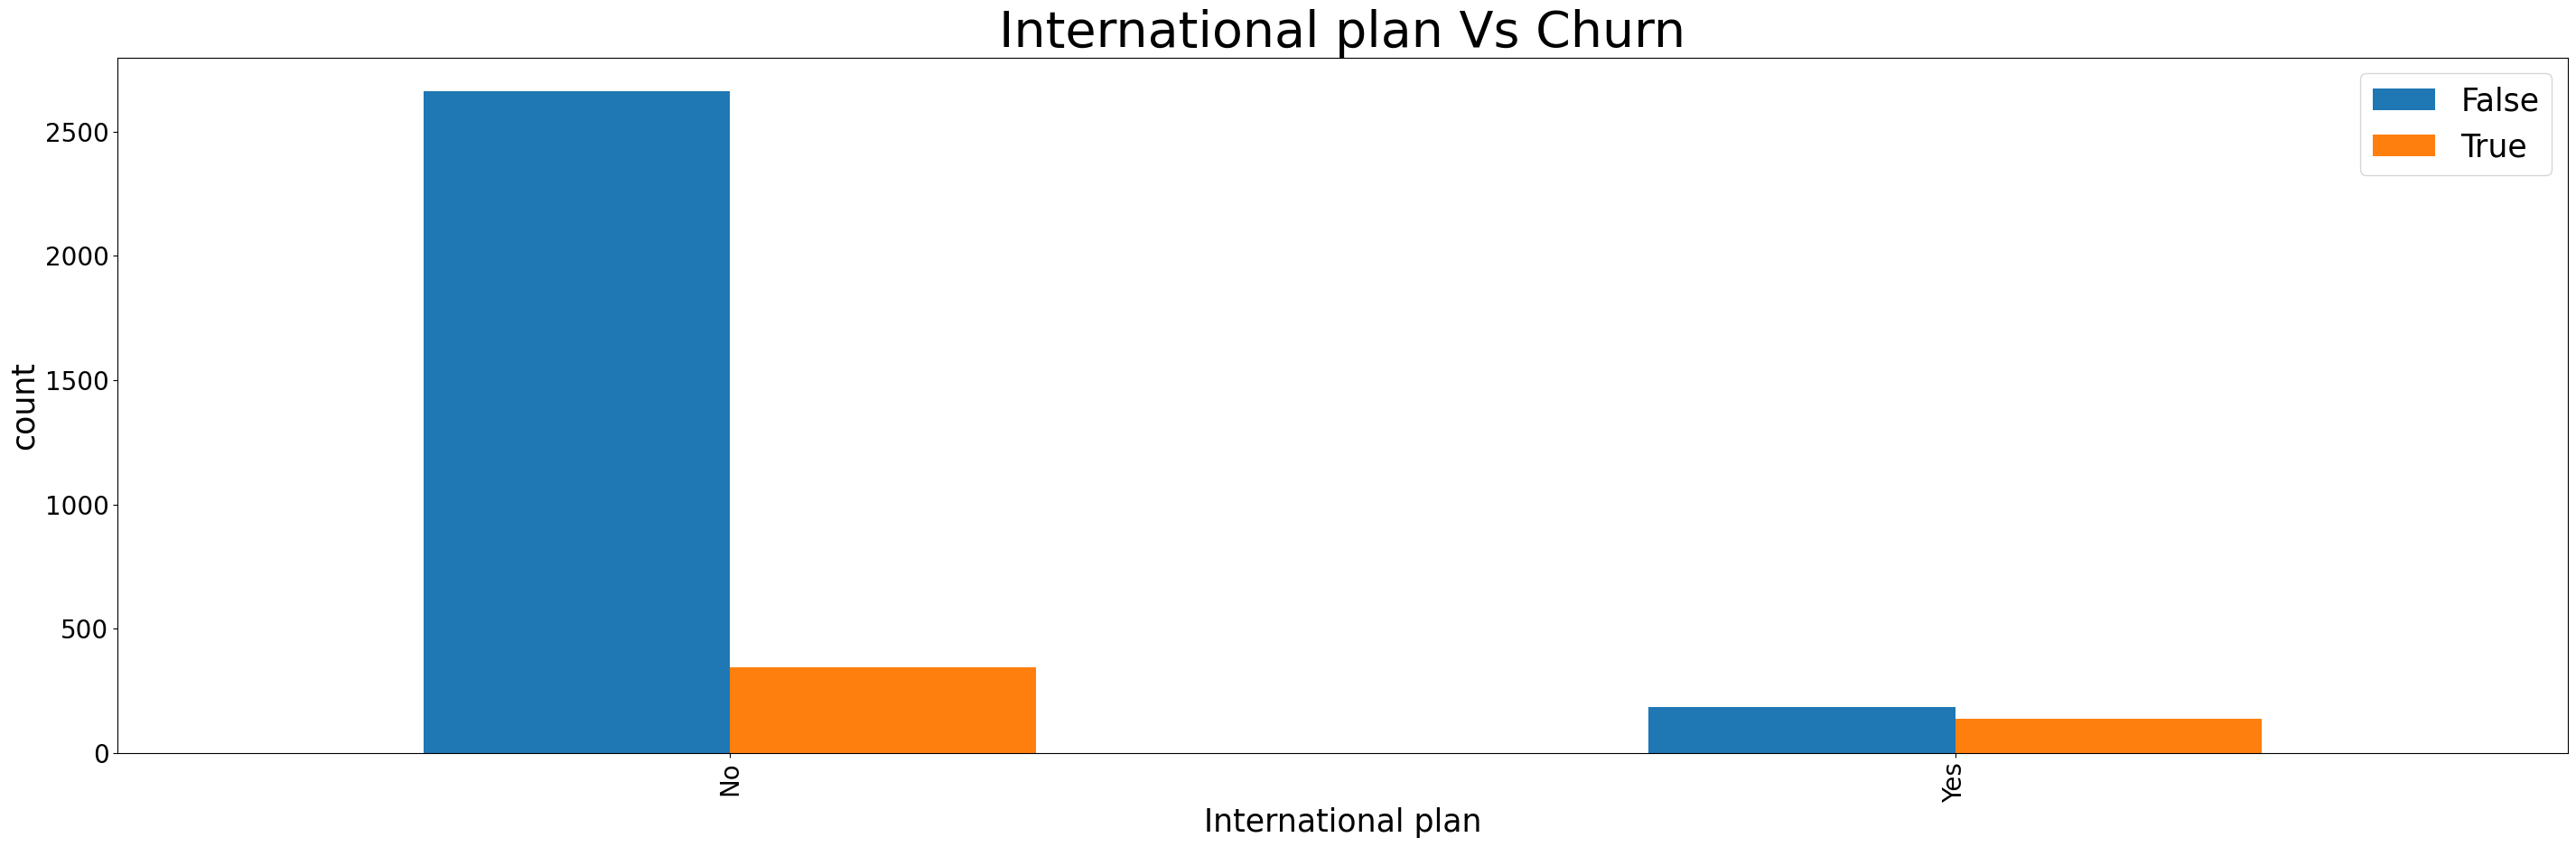

In [22]:
diff_bar('International plan','Churn')

In [23]:
#Show count value of 'yes','no'
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [24]:
#Calculate the International Plan vs Churn percentage 
International_plan_data = pd.crosstab(df["International plan"],df["Churn"])
International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

Churn               False  True  Percentage Churn
International plan                               
No                   2664   346         11.495017
Yes                   186   137         42.414861


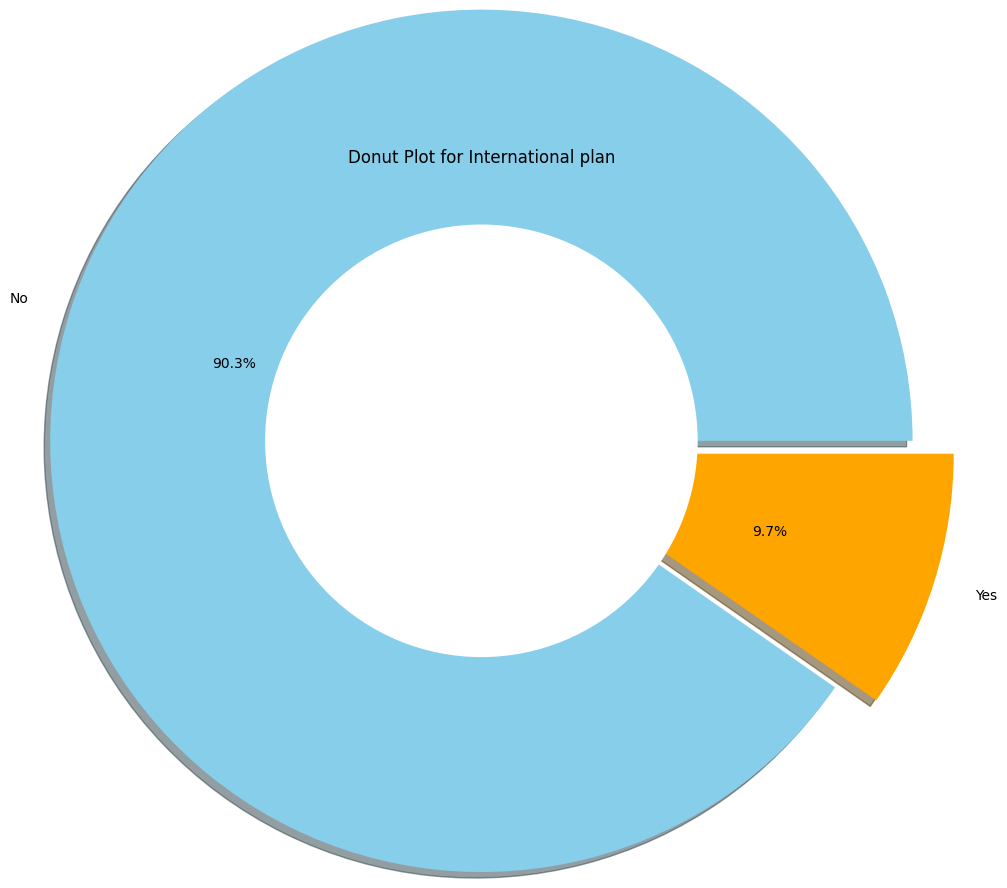

In [25]:
#To get the Donut Plot to analyze International Plan
data = df['International plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['No','Yes'],colors=['skyblue' ,'orange'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for International plan')
plt.show()

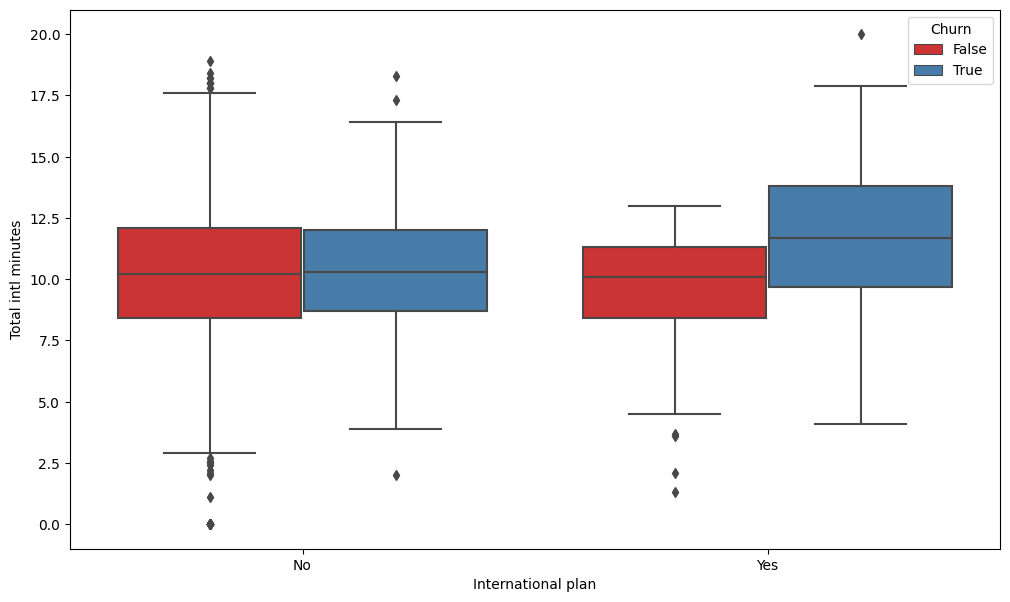

In [26]:
ax = sns.boxplot(x="International plan", y="Total intl minutes", hue="Churn", data=df, palette="Set1")
plt.show()

*From the above data we get*

*There are 3010 customers who dont have a international plan.*

*There are 323 customers who have a international plan.*

*Among those who have a international plan 42.4 % people churn.*

*Whereas among those who dont have a international plan only 11.4 % people churn.*

*So basically the people who bought International plans are churning in big numbers.*

*Probably because of connectivity issues or high call charge.*

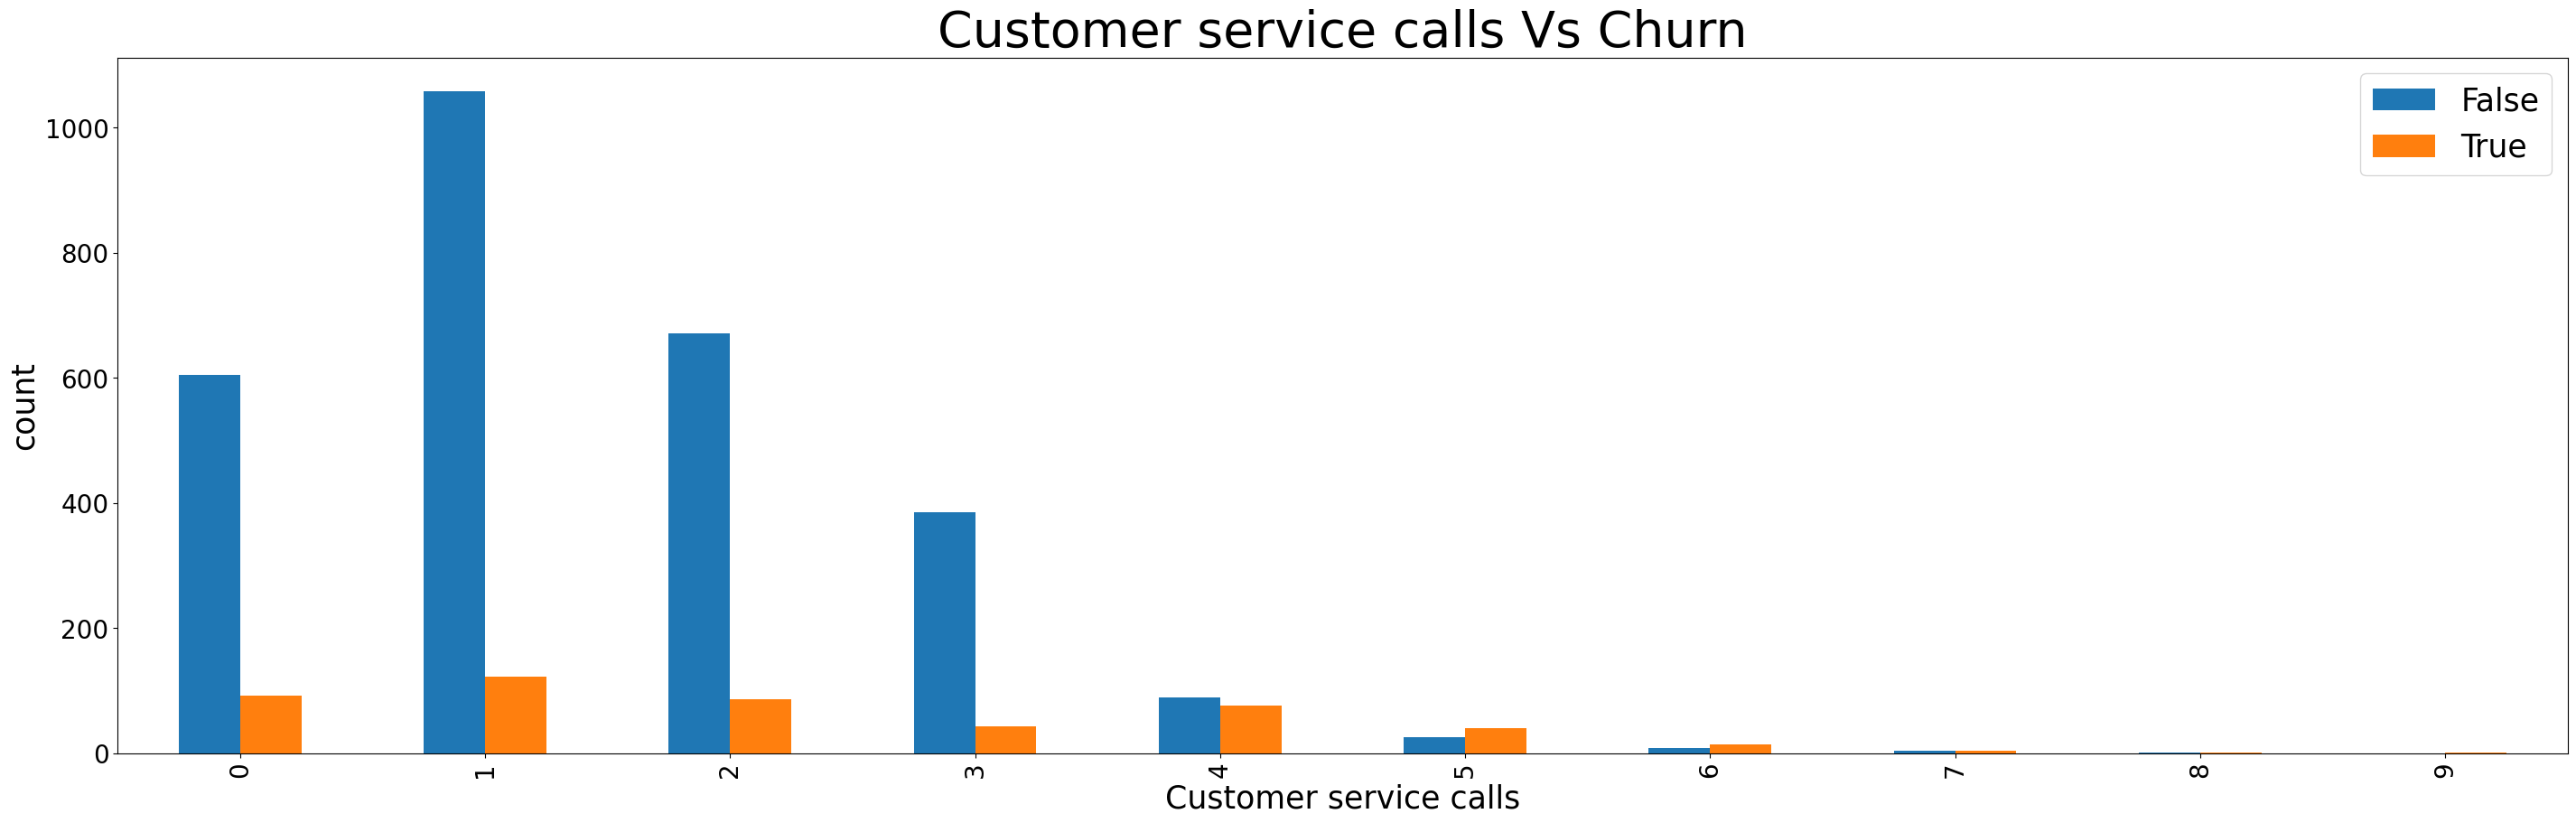

In [27]:
diff_bar('Customer service calls', 'Churn')

In [28]:
#Printing the data of customer service calls 
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [29]:
#Calculating the Customer service calls vs Churn percentage
Customer_service_calls_data = pd.crosstab(df['Customer service calls'],df["Churn"])
Customer_service_calls_data['Percentage_Churn'] = Customer_service_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Customer_service_calls_data)

Churn                   False  True  Percentage_Churn
Customer service calls                               
0                         605    92         13.199426
1                        1059   122         10.330229
2                         672    87         11.462451
3                         385    44         10.256410
4                          90    76         45.783133
5                          26    40         60.606061
6                           8    14         63.636364
7                           4     5         55.555556
8                           1     1         50.000000
9                           0     2        100.000000


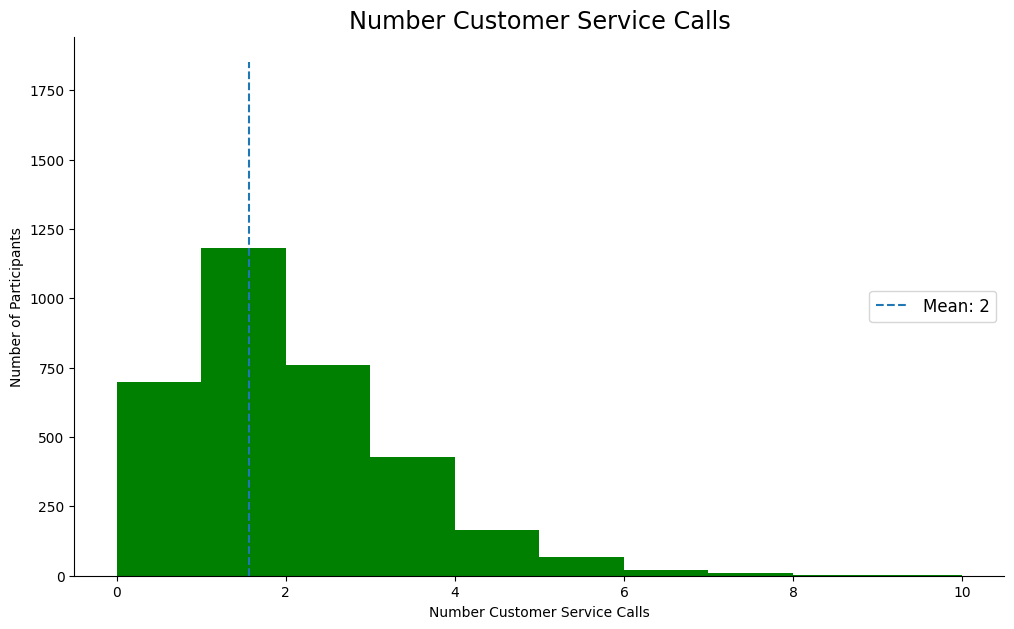

In [30]:
# Plot histogram of number_customer_service_calls
plt.hist(
    df['Customer service calls'],
    bins=10,
    range=(0, 10),
    color='green')
plt.xlabel('Number Customer Service Calls')
plt.ylabel('Number of Participants')
plt.vlines(
    x=df['Customer service calls'].mean(),
    ymin=0,
    ymax=1850,
    linestyles='dashed',
    label="Mean: {:0.0f}".format(
        df['Customer service calls'].mean()))
plt.legend(loc=5, fontsize='large')
sns.set_style('white', {'axes.grid': False})
plt.title('Number Customer Service Calls', fontsize='xx-large')
sns.despine()

*It is observed from the above analysis that, mostly because of bad customer service, people tend to leave the operator.*

*The above data indicating that those customers who called the service center 5 times or above those customer churn percentage is higher than 60%,*

*And customers who have called once also have a high churn rate indicating their issue was not solved in the first attempt.*

*So operator should work to improve the service call.*

In [31]:
#show the data of 'Number vmail messages' 
df['Number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

In [32]:
#Printing the data of 'Number vmail messages'
df['Number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: Number vmail messages, dtype: int64

In [33]:
#Show the details of 'Number vmail messages' data
df['Number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

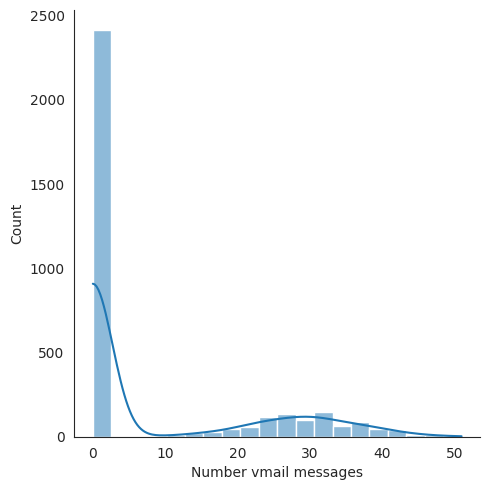

In [34]:
#Analysing by using displot diagram
sns.displot(df['Number vmail messages'], kde = True)
plt.show()

<Figure size 1000x800 with 0 Axes>

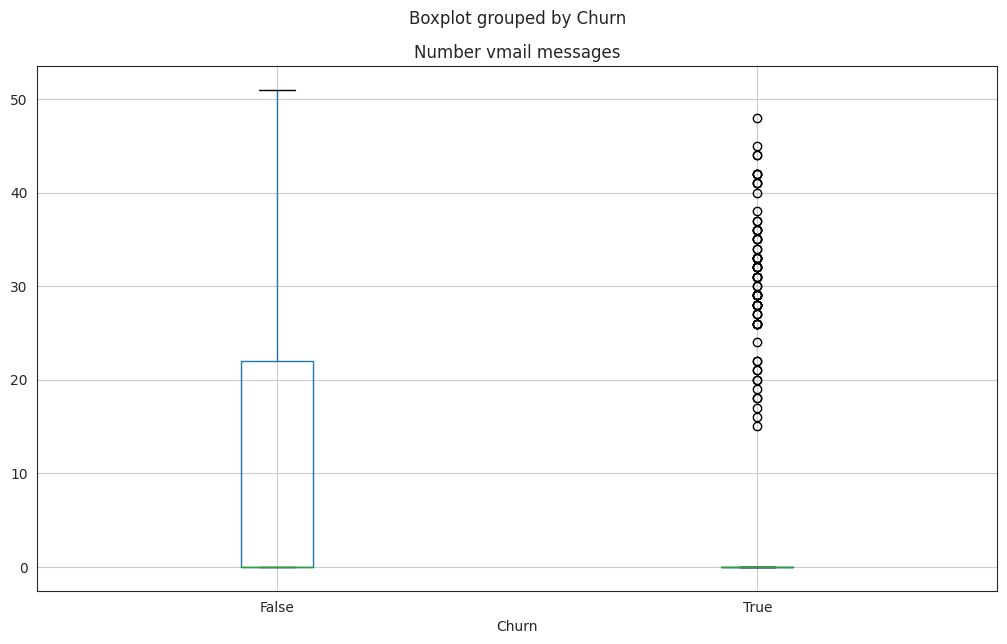

In [35]:
#Analysing by using boxplot diagram between 'number vmail messages' and 'churn'
fig = plt.figure(figsize =(10, 8)) 
df.boxplot(column='Number vmail messages', by='Churn')
fig.suptitle('Number vmail message', fontsize=14, fontweight='bold')
plt.show()

In [36]:
VMail_Churn=df.groupby(['Voice mail plan', 'Churn']).size()

In [37]:
VMail_Churn

Voice mail plan  Churn
No               False    2008
                 True      403
Yes              False     842
                 True       80
dtype: int64

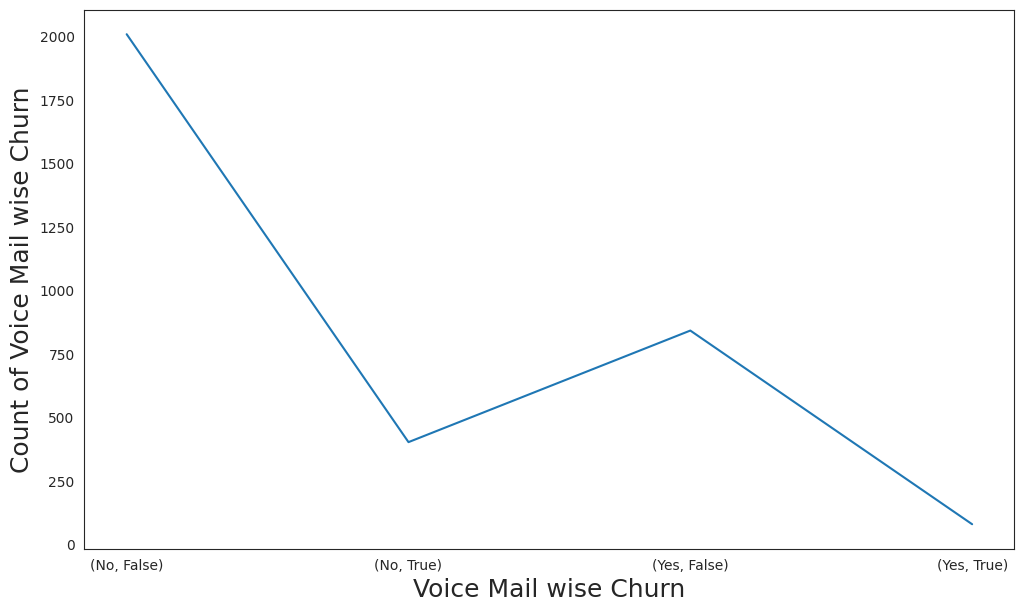

In [38]:
VMail_Churn.plot()
plt.xlabel('Voice Mail wise Churn', fontsize=18)
plt.ylabel('Count of Voice Mail wise Churn', fontsize=18)
plt.show()

In [39]:
#Separating churn and non churn customers
churn_df     = df[df["Churn"] == bool(True)]
not_churn_df = df[df["Churn"] == bool(False)]

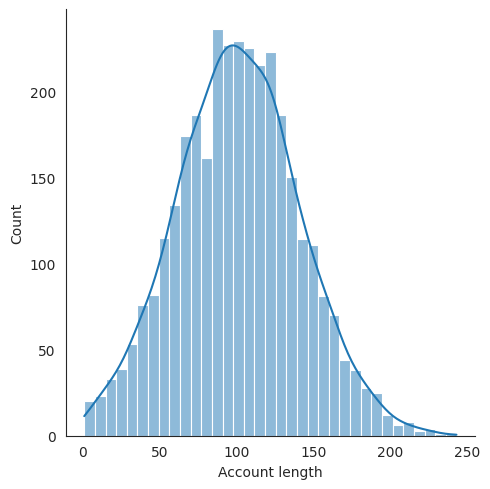

In [40]:
#Account length vs Churn
sns.displot(df['Account length'], kde = True)

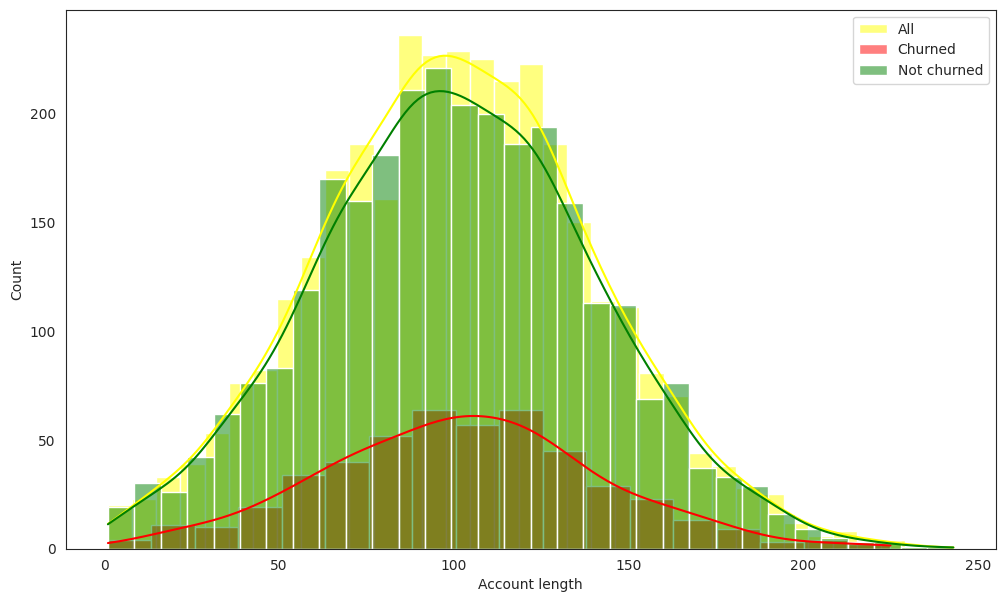

In [41]:
sns.histplot(df['Account length'], kde=True, color='yellow', label="All")
sns.histplot(churn_df['Account length'], kde=True, color="red", label="Churned")
sns.histplot(not_churn_df['Account length'], kde=True, color='green', label="Not churned")
plt.legend()

plt.show()

In [42]:
Account_length = df['Account length']

In [43]:
bins = [0, 12, 24, 48, 60, 72, 84, 96, 108, 120, 132, 144, 168, 180, 192, 204, 216, 228, 240, 252]

categories = pd.cut(Account_length, bins)

In [44]:
Account_Churn=df.groupby([categories, "Churn"]).size()

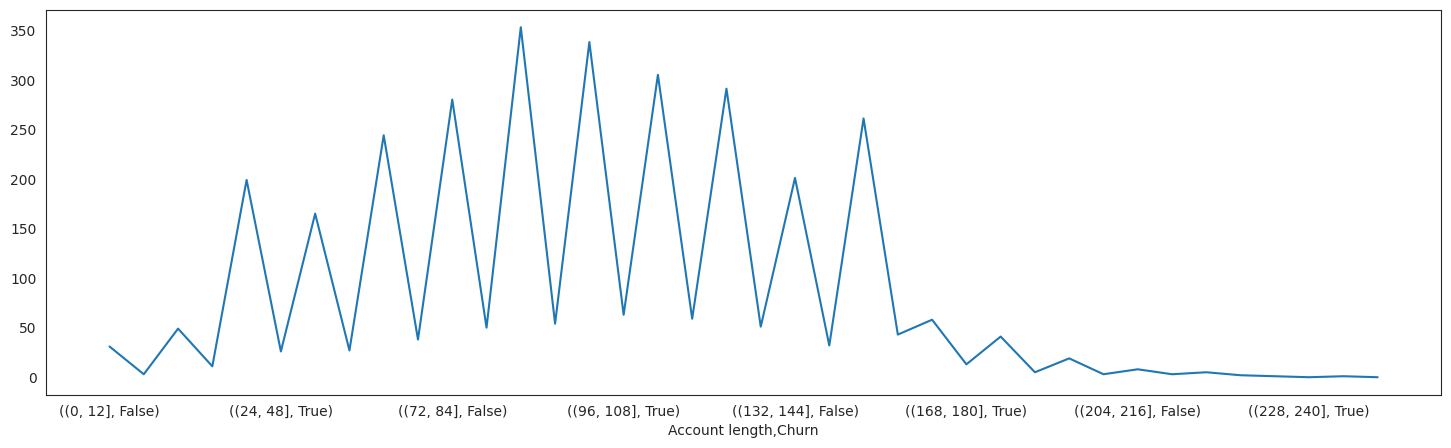

In [45]:
Account_Churn.plot(figsize=(18,5))
plt.show()

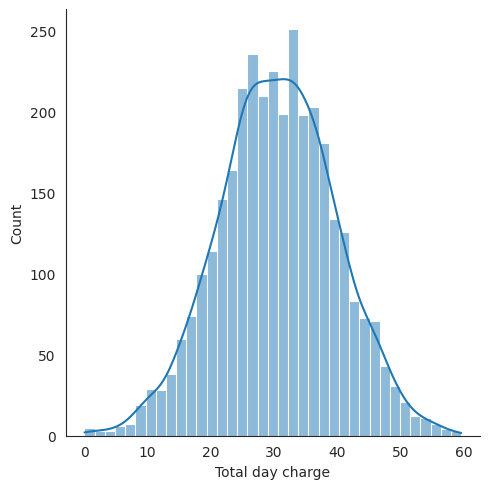

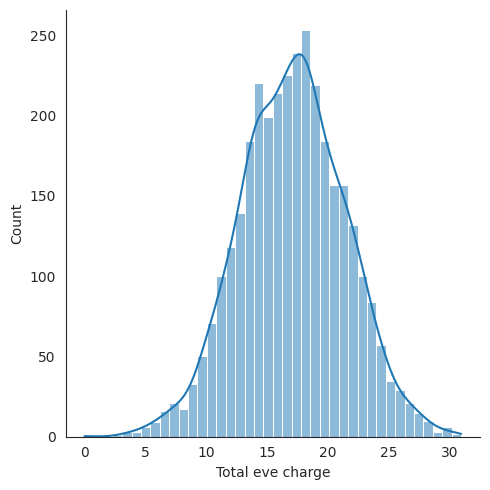

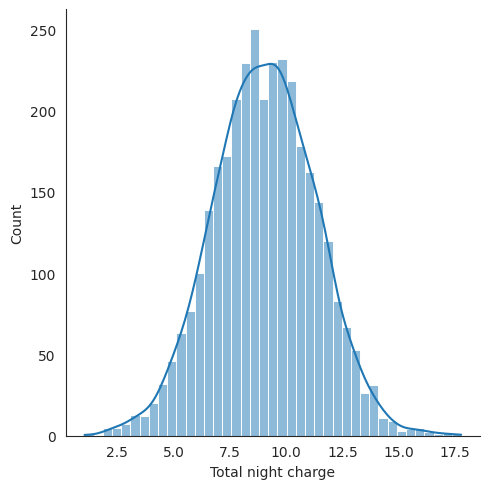

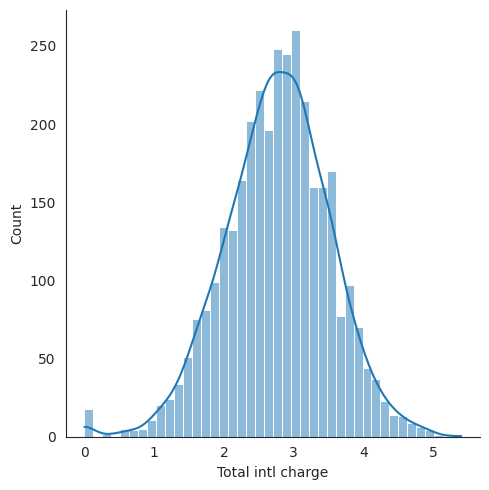

In [46]:
plt.rcParams["figure.figsize"]=(20,5)
sns.displot(df['Total day charge'],kde=True)
plt.show()
sns.displot(df['Total eve charge'],kde = True)
plt.show()
sns.displot(df['Total night charge'], kde = True)
plt.show()
sns.displot(df['Total intl charge'], kde = True)
plt.show()

In [47]:
#Deriving a relation between overall call charge and overall call minutes   
day_charge_per_min = df['Total day charge'].mean()/df['Total day minutes'].mean()
eve_charge_per_min = df['Total eve charge'].mean()/df['Total eve minutes'].mean()
night_charge_per_min = df['Total night charge'].mean()/df['Total night minutes'].mean()
int_charge_per_min= df['Total intl charge'].mean()/df['Total intl minutes'].mean()

In [48]:
def rate_chart():
  print("Day Time Charges per Minute:",round(day_charge_per_min,2))
  print("Evening Time Charges per Minute:",round(eve_charge_per_min,2))
  print("Night Time Charges per Minute:",round(night_charge_per_min,2))
  print("International Charges per Minute:",round(int_charge_per_min,2))

rate_chart()

Day Time Charges per Minute: 0.17
Evening Time Charges per Minute: 0.09
Night Time Charges per Minute: 0.05
International Charges per Minute: 0.27


<Axes: >

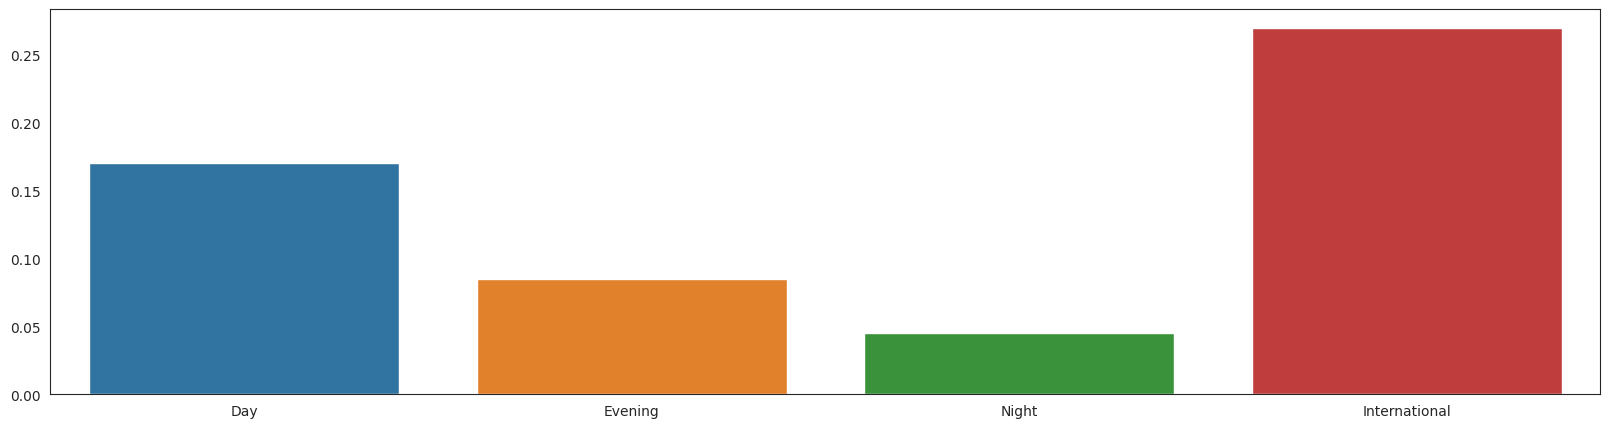

In [49]:
sns.barplot(x=['Day','Evening','Night','International'],y=[day_charge_per_min,eve_charge_per_min,night_charge_per_min,int_charge_per_min])

## **Feature Selection**


In [50]:
# Imputing with mean because fancyimpute not working
for i in col_name:
    print (i)
    df_1 = df.apply(lambda x:x.fillna(df.loc[:,i].mean()))   

Account length
Area code
Number vmail messages
Total day minutes
Total day calls
Total day charge
Total eve minutes
Total eve calls
Total eve charge
Total night minutes
Total night calls
Total night charge
Total intl minutes
Total intl calls
Total intl charge
Customer service calls


<ipython-input-51-57531ce0d708>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\


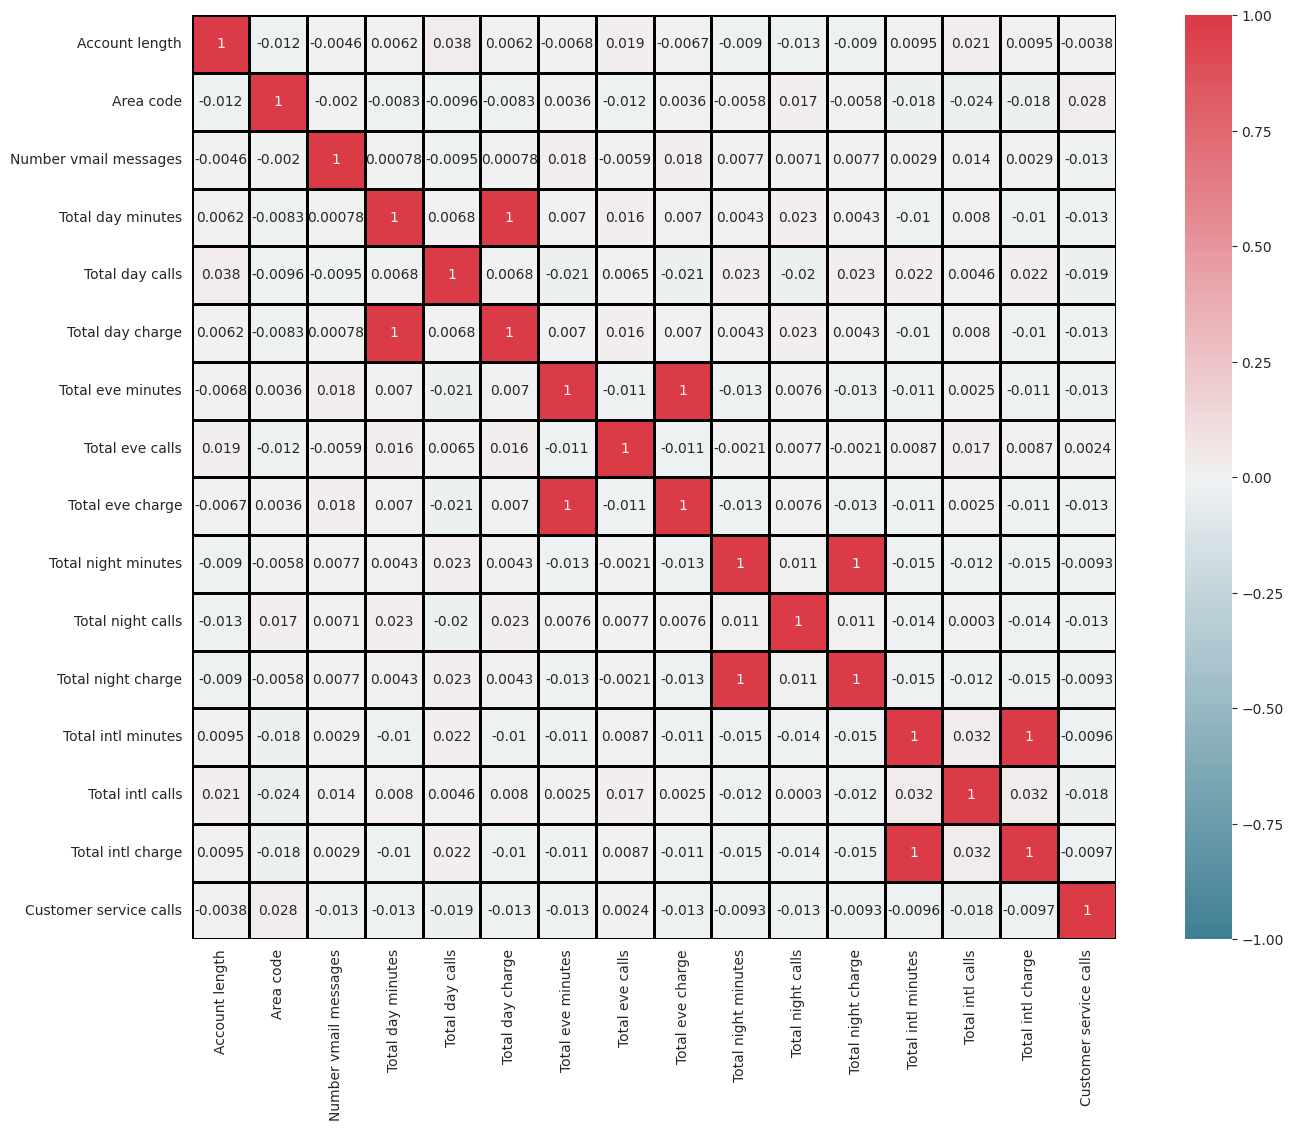

In [51]:
#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(18,12))  #Width,height

#Generating Corelation Matrix
corr = df[col_name].corr()

#Plot using Seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()
#f.savefig('heatmap.png')

In [52]:
#checking Relation b/w categorical variables with respect to target var
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    #As we know input to chi square is always a contiguency table so we generating it using crostab function present in pd
    chi2, p, dof, ex =chi2_contingency(pd.crosstab(df_1['Churn'],df_1[i]))
    #as above pd.crosstab(dependent variable , independent variable)
    print(p)
    
#chi2 = Actual chi square test value
#p = pvalue
#dof = degree of freedom
#ex = expected value

# As if p value is less than 0.05 then we will reject null hypothesis
#Null = both the variables are independent
#Alternate = Both the variables are not independent

State
0.002296221552011188
International plan
2.4931077033159556e-50
Voice mail plan
5.15063965903898e-09


In [53]:
#Removing correlated variable & the variable which doesn't contain any meaning full info
remove = ['State','Total day charge','Total eve charge','Total night charge','Total intl charge']
df_1 = df_1.drop(remove,axis=1)

In [54]:
df_1

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,No,Yes,36,156.2,77,215.5,126,279.1,83,9.9,6,2,False
3329,68,415,No,No,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False
3330,28,510,No,No,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False
3331,184,510,Yes,No,0,213.8,105,159.6,84,139.2,137,5.0,10,2,False


In [55]:
#Updating values _after removal of var
col_name = ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes',
         'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls',
         'Customer service calls']

#All categorical var and removing target var
cat_names = ['Area code', 'International plan', 'Voice mail plan']

print('colum name :- {}'.format(col_name))
print()
print('category name :- {}'.format(cat_names))

colum name :- ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes', 'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls', 'Customer service calls']

category name :- ['Area code', 'International plan', 'Voice mail plan']


## **Feature Scaling**

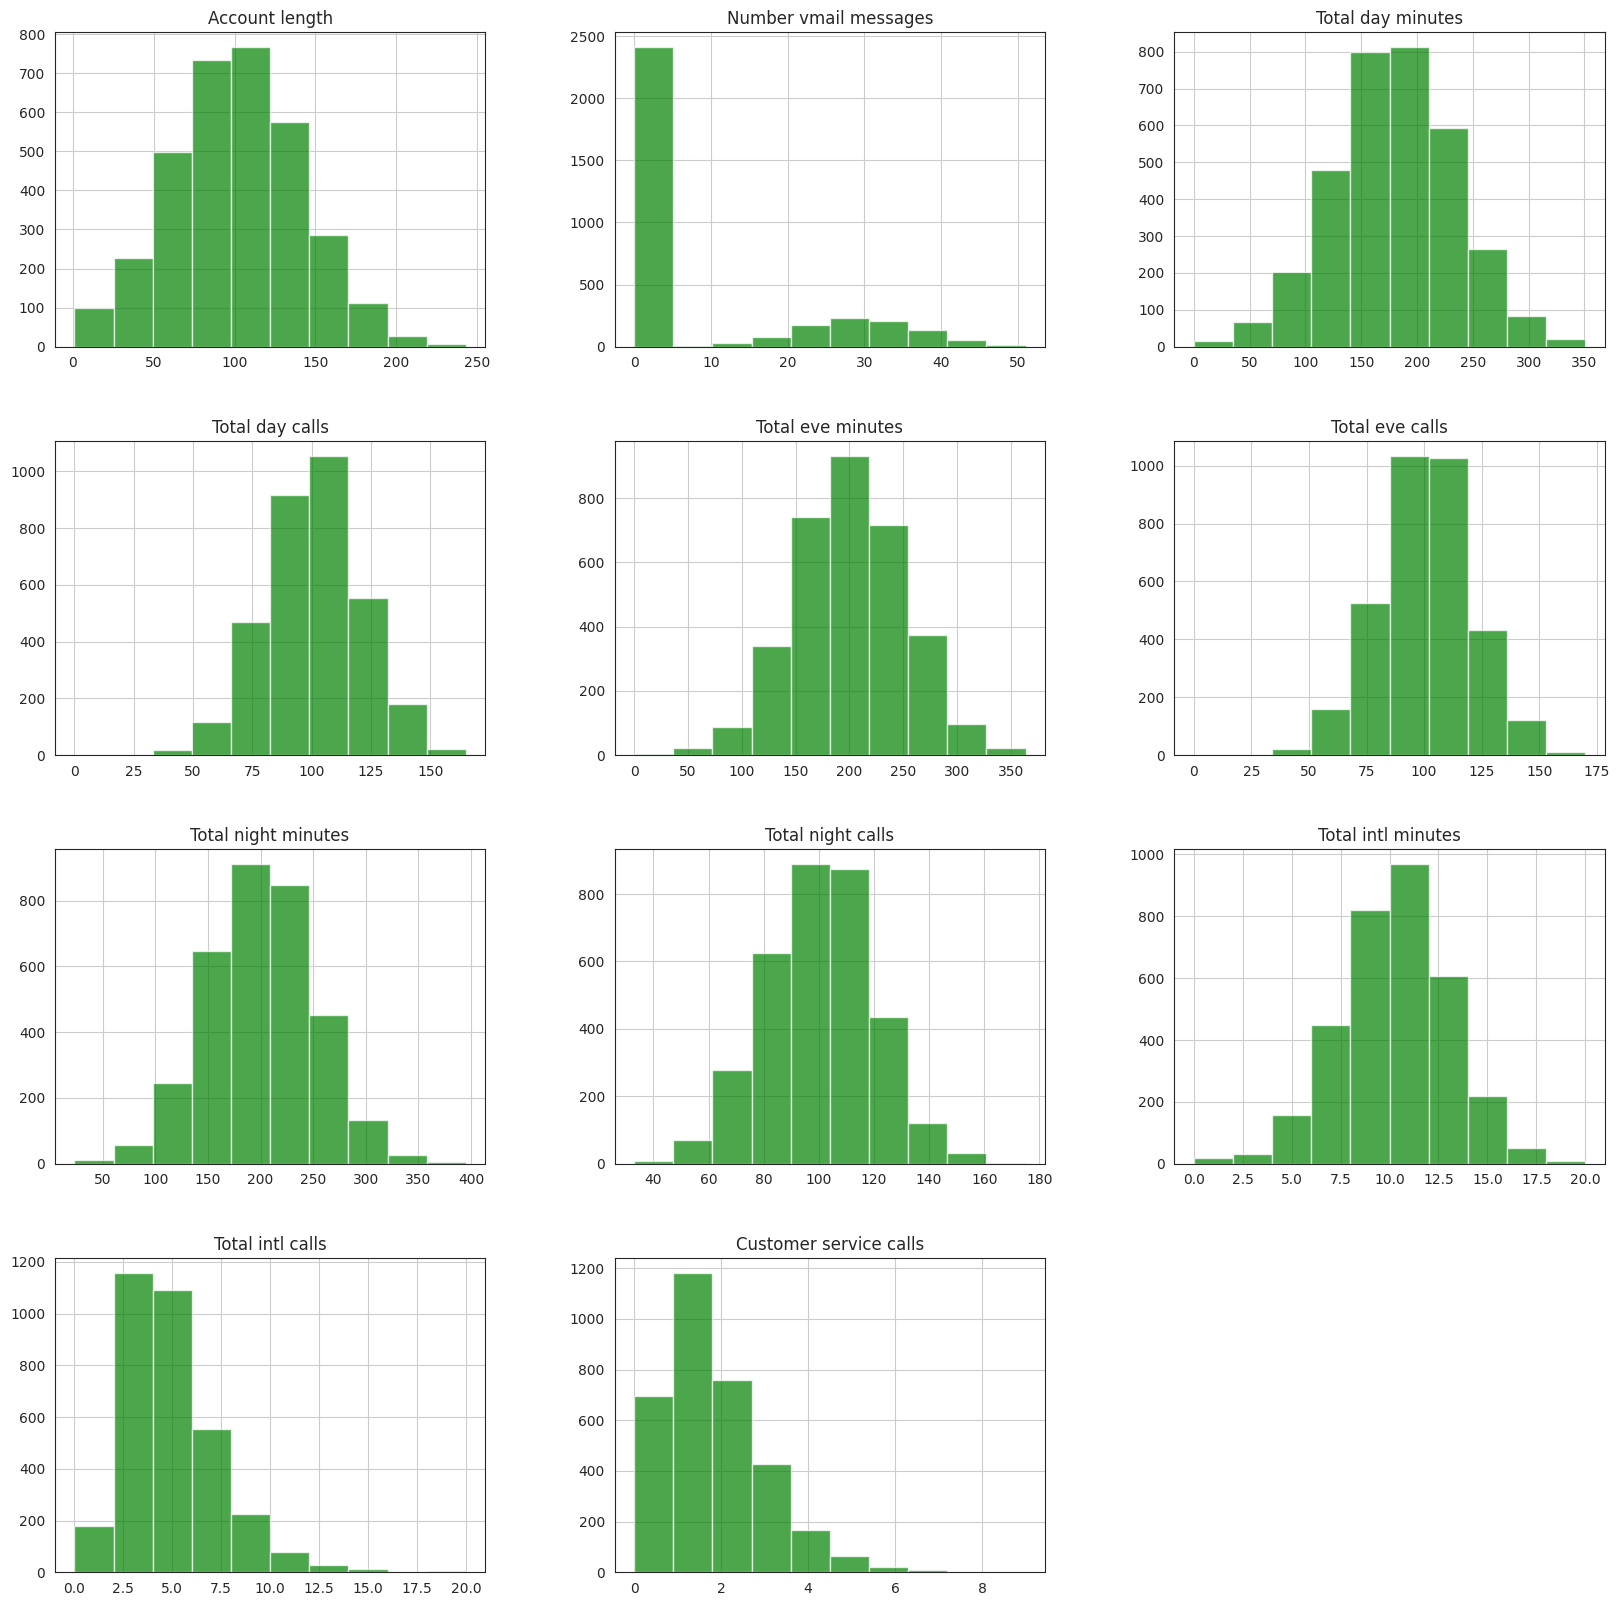

In [56]:
#Checking distribution of data via pandas visualization
df_1[col_name].hist(figsize=(20,20),color='g',alpha = 0.7)
#plt.savefig('distribution.png')
plt.show()

In [57]:
# #Histogram breaks down by target variable
def plot_hist_y(x,y):
    plt.hist(list(x[y == 1]),color='green',label='True',bins='auto')
    plt.hist(list(x[y == 0]),color='grey', alpha = 0.7, label='False',bins='auto')
    plt.title("Histogram of {var} breakdown by {Y}".format(var = x.name,Y=y.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.savefig("Histogram of {var} breakdown by {Y}.png".format(var = x.name,Y=y.name))
    plt.show()

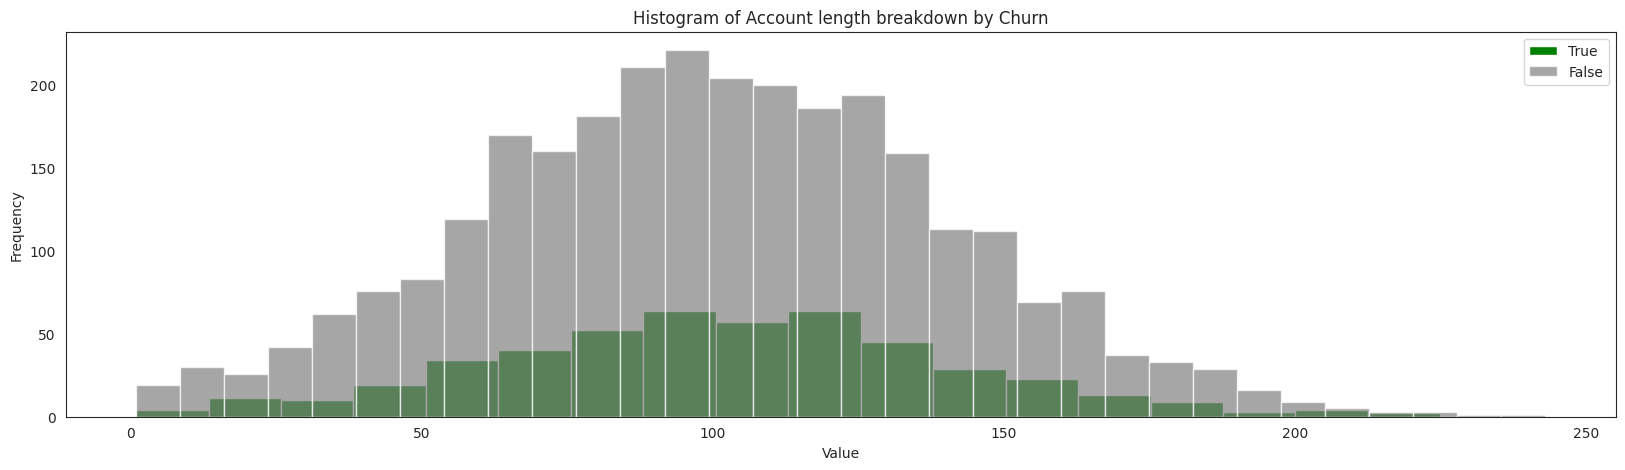

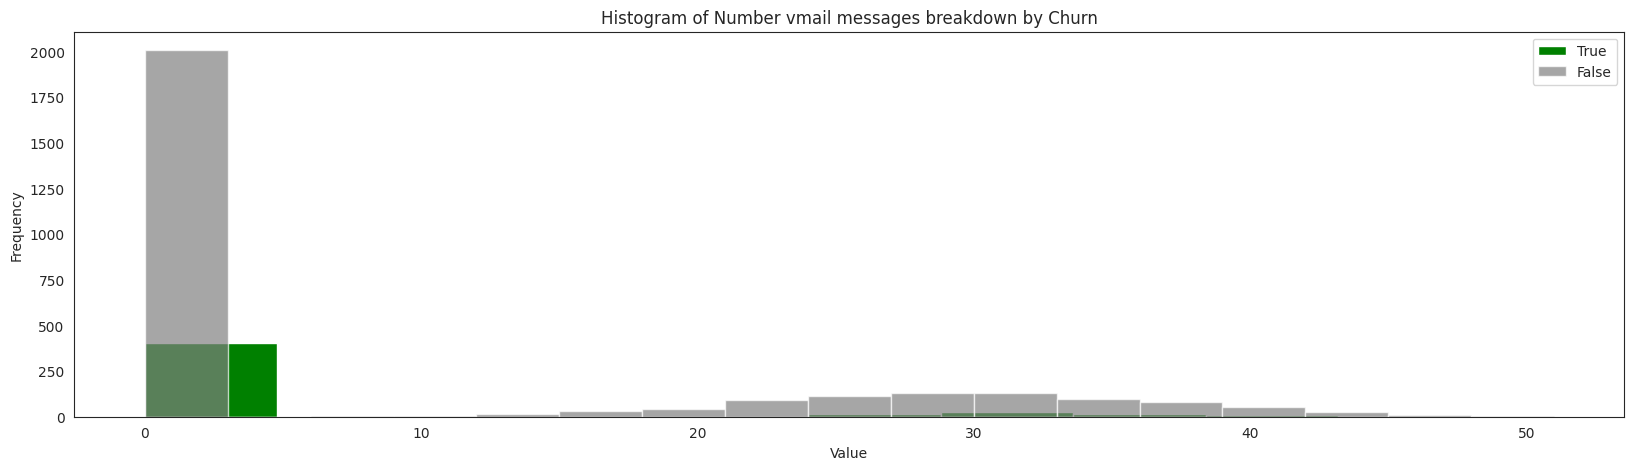

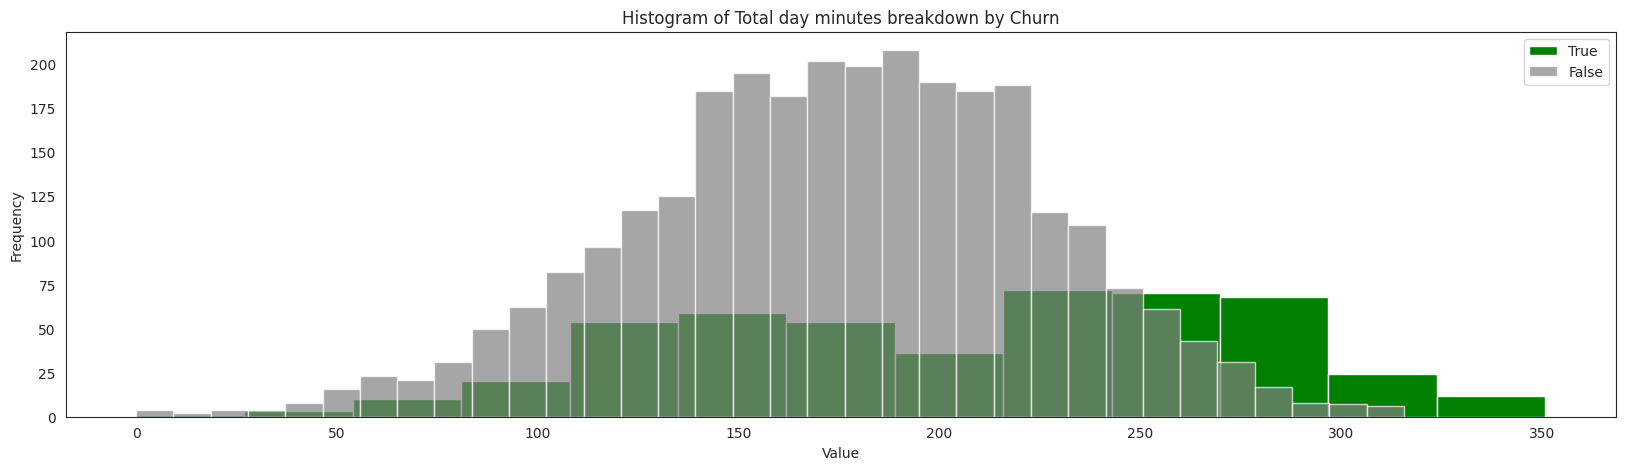

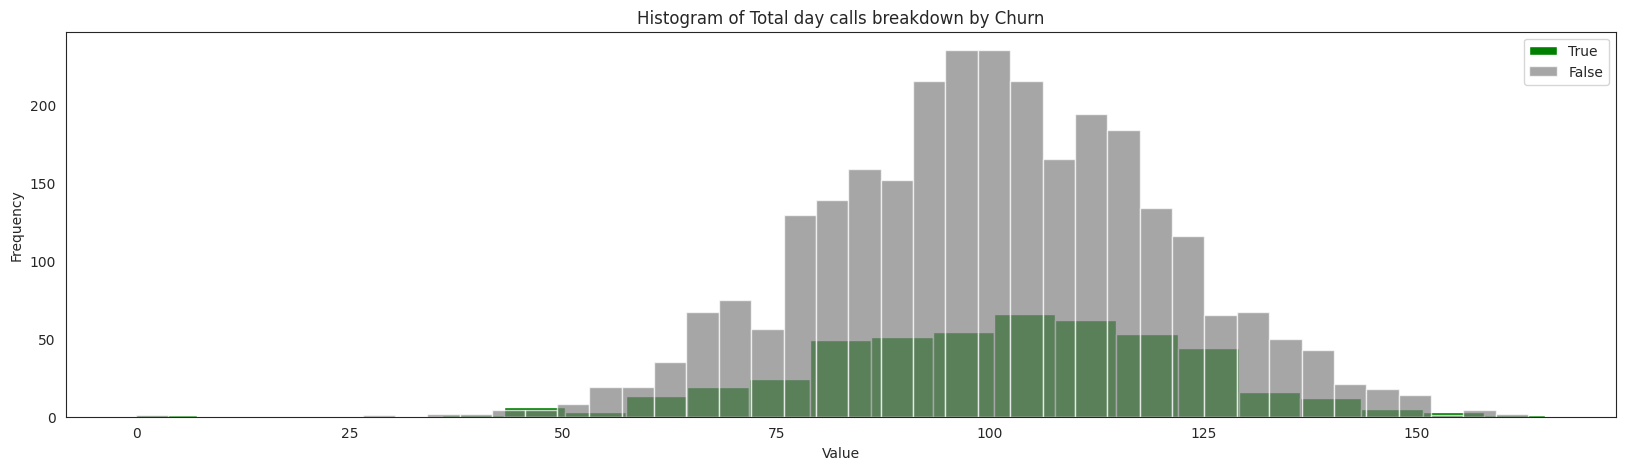

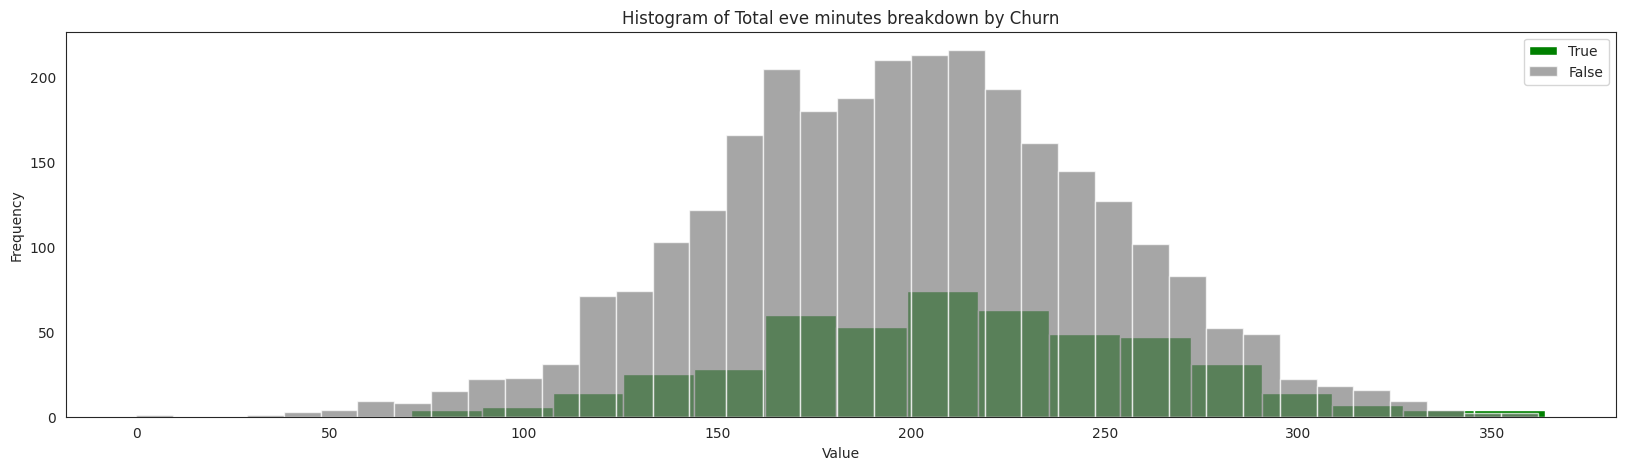

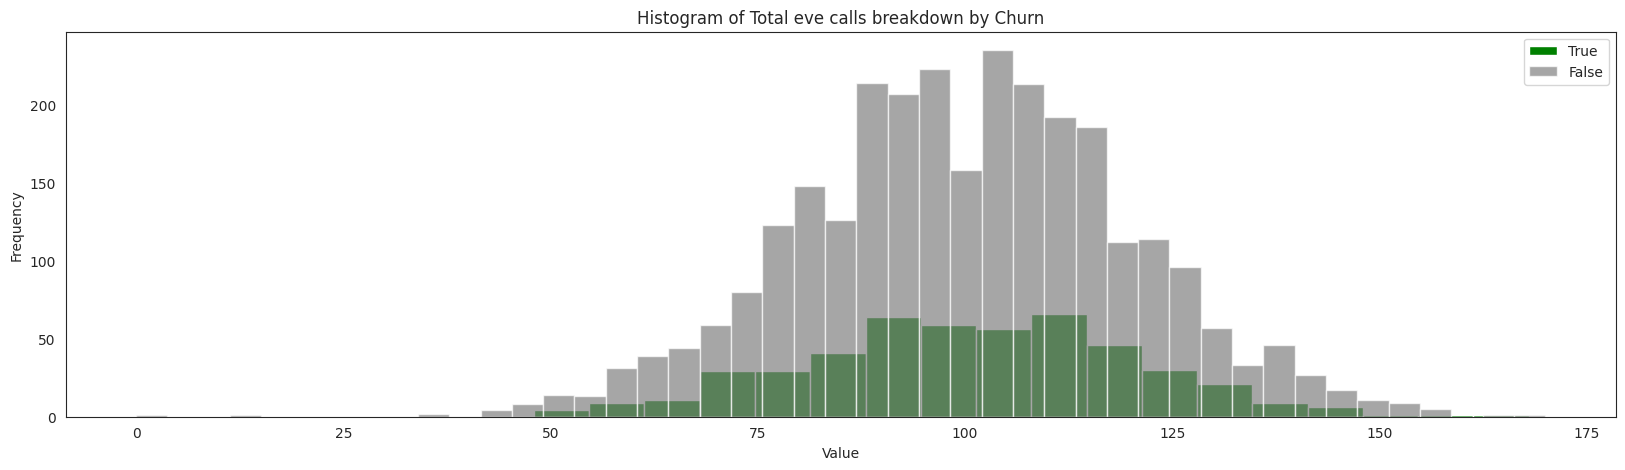

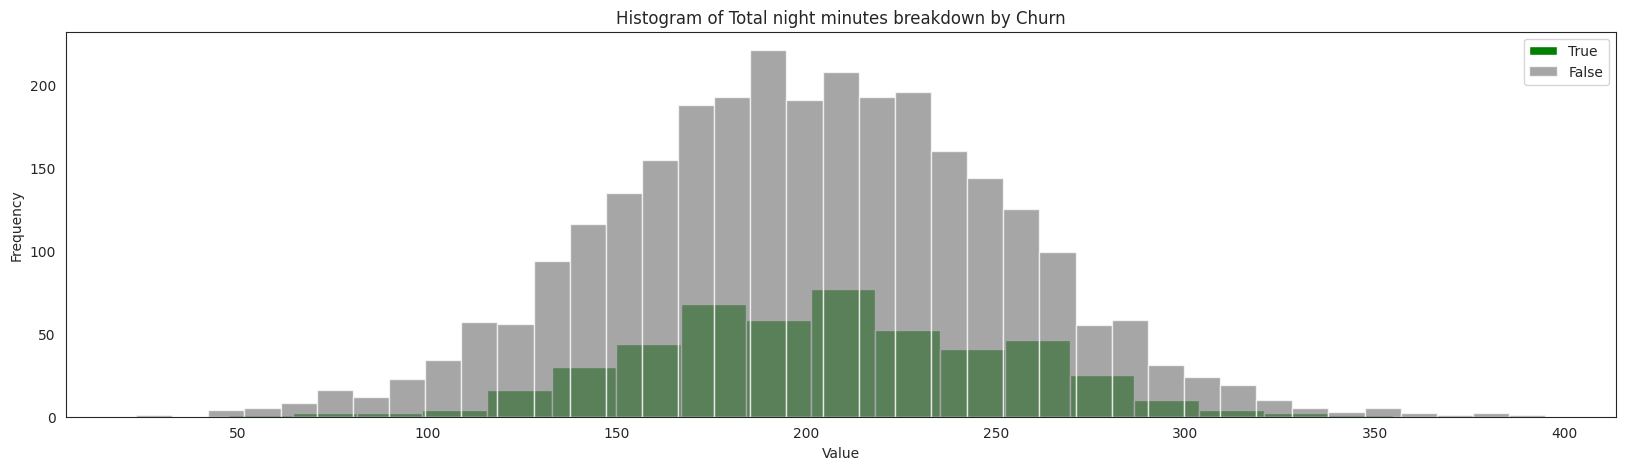

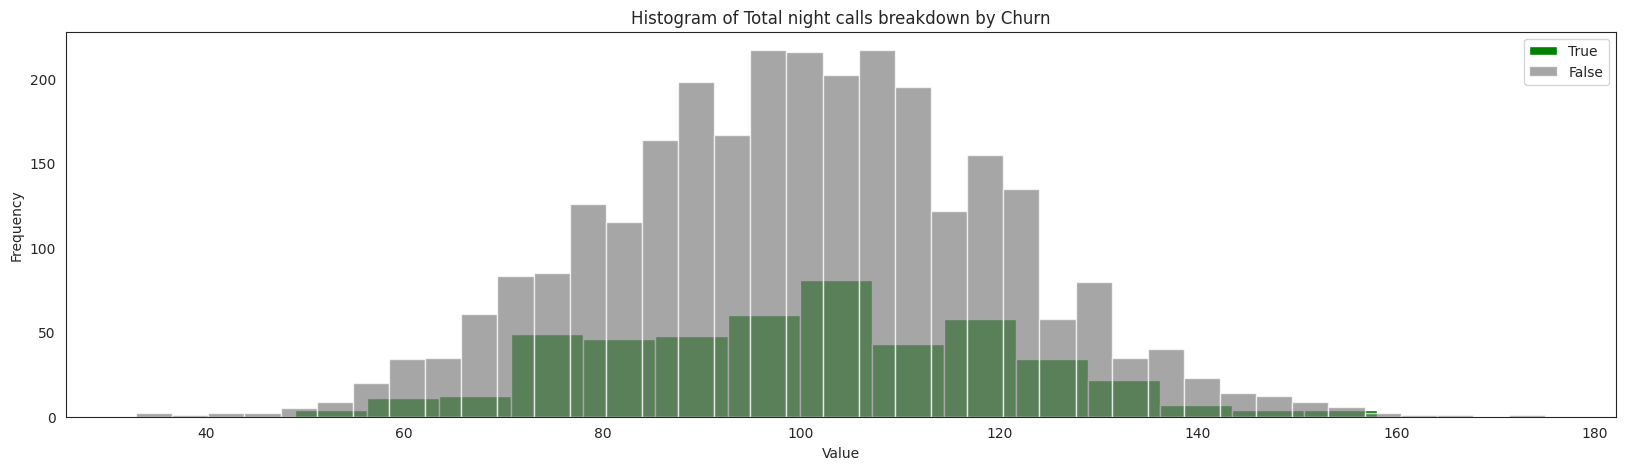

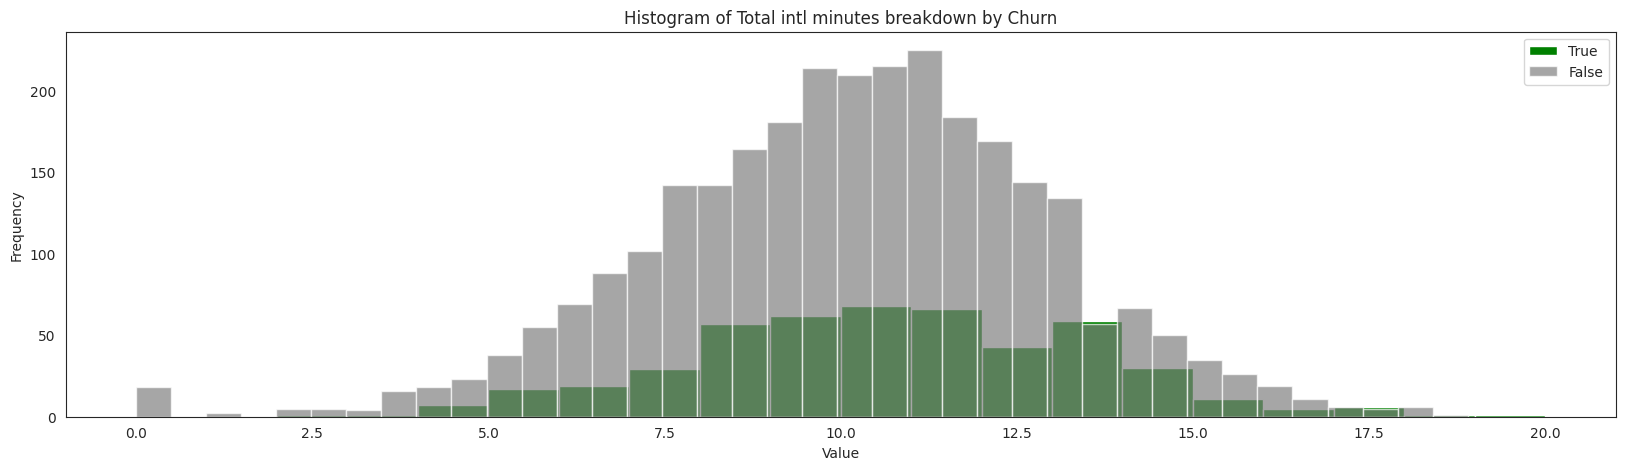

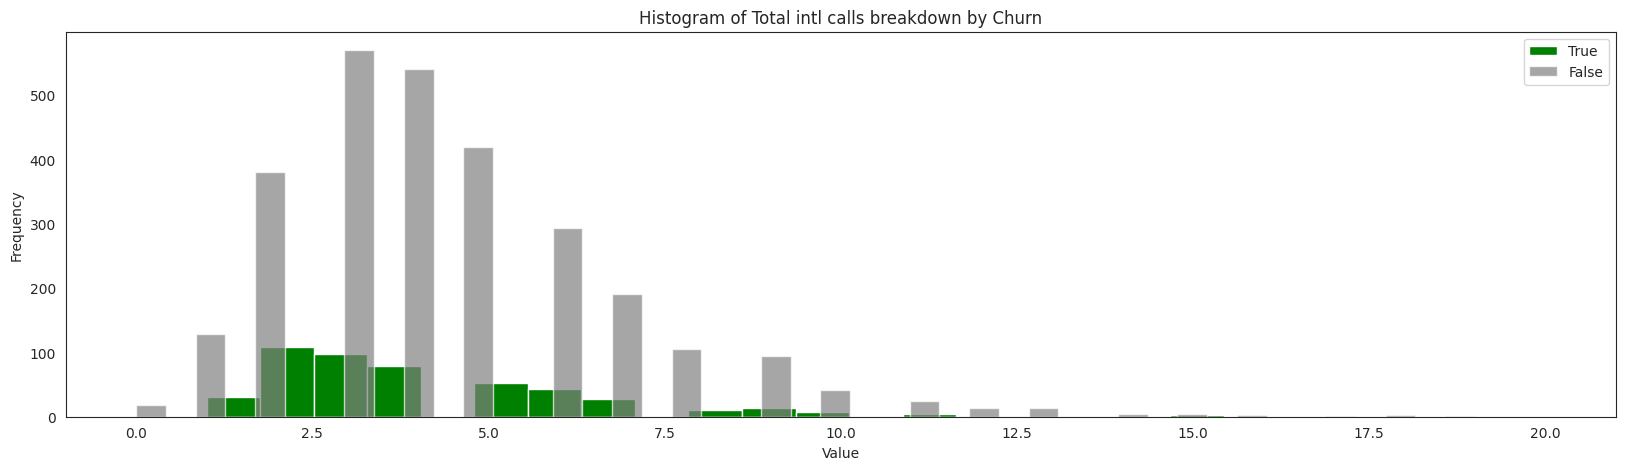

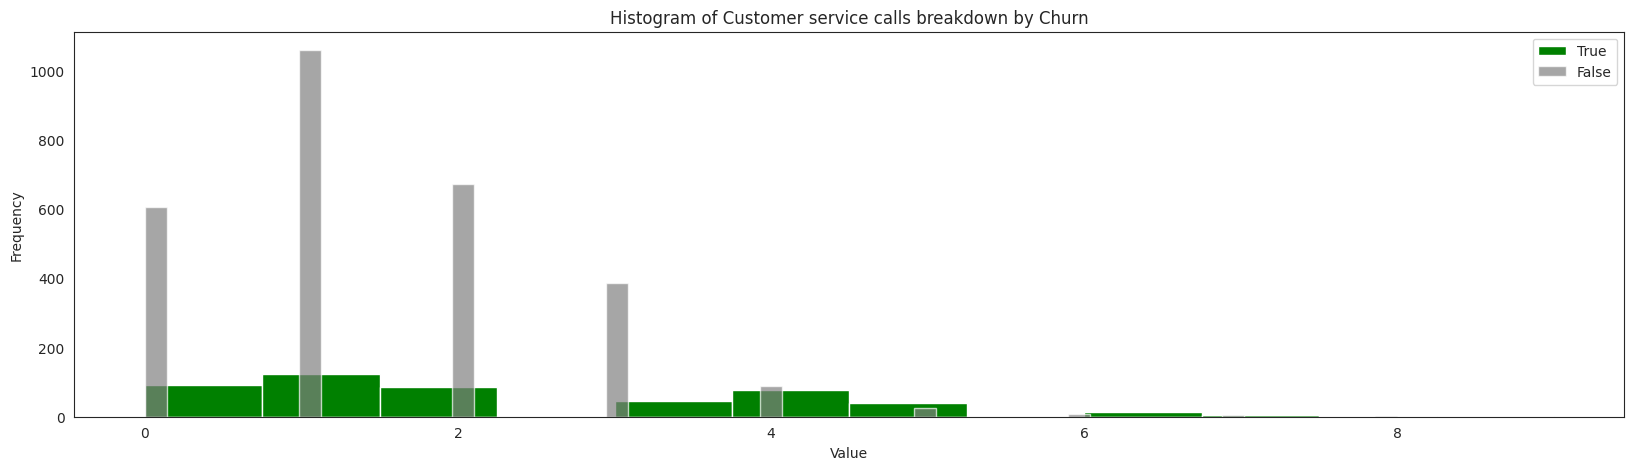

In [58]:
for i in col_name:
    #print(i)
    plot_hist_y(df_1[i],df_1.Churn)

## **Scaling**

In [59]:
#Applying standarization as most of the variables are normalized distributed
def scale_standard(df):
    for i in col_name:
        #print(i)
        df_1[i] = (df_1[i] - df_1[i].mean())/df_1[i].std()
    return df

In [60]:
df_1 = scale_standard(df_1)

In [61]:
df_1.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,0.676388,415,No,Yes,1.234697,1.566532,0.476572,-0.070599,-0.055932,0.866613,-0.465425,-0.084995,-0.601105,-0.427868,False
1,0.149043,415,No,Yes,1.307752,-0.333688,1.124334,-0.108064,0.144845,1.058412,0.147802,1.240296,-0.601105,-0.427868,False
2,0.902393,415,No,No,-0.591671,1.168128,0.675883,-1.573147,0.496204,-0.756756,0.198905,0.703015,0.211502,-1.188040,False
3,-0.428526,408,Yes,No,-0.591671,2.196267,-1.466716,-2.742453,-0.608068,-0.078539,-0.567629,-1.302831,1.024109,0.332305,False
4,-0.654531,415,Yes,No,-0.591671,-0.240054,0.626055,-1.038776,1.098534,-0.276270,1.067643,-0.049177,-0.601105,1.092477,False


In [68]:
df_1['Churn'] = df_1['Churn'].astype(bool).astype(int)
df_1['International plan'] = df_1['International plan'].astype(bool).astype(int)
df_1['Voice mail plan'] = df_1['Voice mail plan'].astype(bool).astype(int)

In [69]:
df_1.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,0.676388,415,1,1,1.234697,1.566532,0.476572,-0.070599,-0.055932,0.866613,-0.465425,-0.084995,-0.601105,-0.427868,0
1,0.149043,415,1,1,1.307752,-0.333688,1.124334,-0.108064,0.144845,1.058412,0.147802,1.240296,-0.601105,-0.427868,0
2,0.902393,415,1,1,-0.591671,1.168128,0.675883,-1.573147,0.496204,-0.756756,0.198905,0.703015,0.211502,-1.188040,0
3,-0.428526,408,1,1,-0.591671,2.196267,-1.466716,-2.742453,-0.608068,-0.078539,-0.567629,-1.302831,1.024109,0.332305,0
4,-0.654531,415,1,1,-0.591671,-0.240054,0.626055,-1.038776,1.098534,-0.276270,1.067643,-0.049177,-0.601105,1.092477,0


In [70]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   float64
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Number vmail messages   3333 non-null   float64
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   float64
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   float64
 9   Total night minutes     3333 non-null   float64
 10  Total night calls       3333 non-null   float64
 11  Total intl minutes      3333 non-null   float64
 12  Total intl calls        3333 non-null   float64
 13  Customer service calls  3333 non-null   float64
 14  Churn                   3333 non-null   

### Performing Stratified Sampling

In [71]:
#Using train test split functionality for creating sampling
X = df_1.iloc[:,:14]
y = df_1.iloc[:,14]
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [72]:
(X_train.shape),(y_train.shape)

((2233, 14), (2233,))

Using SMOTE ( SMOTE: Synthetic Minority Over-sampling Technique)
<br > Due to target variable imbalance, it's good to over sample the minority class .

In [73]:
from imblearn.over_sampling import SMOTE

Smo = SMOTE(random_state=101)
X_train_res, y_train_res = Smo.fit_resample(X_train,y_train)

In [74]:
(X_train_res.shape,y_train_res.shape)

((3790, 14), (3790,))

In [75]:
#Predicting & Stats Function

def pred(model_object,predictors,compare):
    """1.model_object = model name
       2.predictors = data to be predicted
       3.compare = y_train"""
    predicted = model_object.predict(predictors)
    # Determine the false positive and true positive rates
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()
    
    ##check accuracy of model
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('Specificity //  True Negative Rate :- ',round((TN*100)/(TN+FP),2))
    print()
    print('Sensivity // True Positive Rate // Recall :- ',round((TP*100)/(FN+TP),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))

## **Model Level Approach**

### **Random Forest**

In [76]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100,random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(rf_model,X_test,y_test)


# Accuracy :-  91.27
# Specificity //  True Negative Rate :-  95.5
# Sensivity // True Positive Rate // Recall :-  63.45
# False Negative Rate :-  36.55
# False Postive Rate :-  4.5

CONFUSION MATRIX ------->> 
col_0    0   1
Churn         
0      912  43
1       53  92

Classification paradox :------->>
Accuracy :-  91.27

Specificity //  True Negative Rate :-  95.5

Sensivity // True Positive Rate // Recall :-  63.45

False Negative Rate :-  36.55

False Postive Rate :-  4.5

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       955
           1       0.68      0.63      0.66       145

    accuracy                           0.91      1100
   macro avg       0.81      0.79      0.80      1100
weighted avg       0.91      0.91      0.91      1100



The outcomes and evaluation metrics provide insights into the model's performance, particularly in terms of correctly predicting the negative class (Churn=0) with high specificity but struggling to identify positive instances (Churn=1) with lower sensitivity. 

### **Logistic Regression**

In [77]:
from sklearn.linear_model import LogisticRegression
#logistic without binaries
logit_model = LogisticRegression(random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(logit_model,X_test,y_test)


# Accuracy :-  71.45
# Specificity //  True Negative Rate :-  72.25
# Sensivity // True Positive Rate // Recall :-  66.21
# False Negative Rate :-  33.79
# False Postive Rate :-  27.75

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      690  265
1       49   96

Classification paradox :------->>
Accuracy :-  71.45

Specificity //  True Negative Rate :-  72.25

Sensivity // True Positive Rate // Recall :-  66.21

False Negative Rate :-  33.79

False Postive Rate :-  27.75

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       955
           1       0.27      0.66      0.38       145

    accuracy                           0.71      1100
   macro avg       0.60      0.69      0.60      1100
weighted avg       0.85      0.71      0.76      1100



The evaluation metrics provide insights into the performance of the Logistic Regression model. The model exhibits lower accuracy, precision, and sensitivity compared to the Random Forest Classifier. It correctly predicts a higher proportion of negative instances (Churn=0) but struggles to identify positive instances (Churn=1) with lower sensitivity. The false negative rate is relatively high, indicating a significant number of actual positive instances being misclassified as negatives

### **K-Nearest Neighbors**

In [78]:
from sklearn.neighbors import KNeighborsClassifier
#KNN Model Development
KNN_Model = KNeighborsClassifier(n_neighbors=5).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(KNN_Model,X_test,y_test)

# Classification paradox :------->>
# Accuracy :-  72.73
# Specificity //  True Negative Rate :-  74.76
# Sensivity // True Positive Rate // Recall :-  59.31
# False Negative Rate :-  40.69
# False Postive Rate :-  25.24

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      714  241
1       59   86

Classification paradox :------->>
Accuracy :-  72.73

Specificity //  True Negative Rate :-  74.76

Sensivity // True Positive Rate // Recall :-  59.31

False Negative Rate :-  40.69

False Postive Rate :-  25.24

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       955
           1       0.26      0.59      0.36       145

    accuracy                           0.73      1100
   macro avg       0.59      0.67      0.60      1100
weighted avg       0.84      0.73      0.77      1100



The evaluation metrics provide insights into the performance of the KNN model. The model exhibits lower accuracy, precision, and sensitivity compared to the Random Forest Classifier and Logistic Regression. It correctly predicts a higher proportion of negative instances (Churn=0) but struggles to identify positive instances (Churn=1) with lower sensitivity. The false negative rate is relatively high, indicating a significant number of actual positive instances being misclassified as negatives.

In [79]:
from sklearn.naive_bayes import GaussianNB
#Navie Model Development
Naive_model = GaussianNB().fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(Naive_model,X_test,y_test)

# Classification paradox :------->>
# Accuracy :- 70.27 
# Specificity //  True Negative Rate :-  69.84
# Sensivity // True Positive Rate // Recall :-  73.1
# False Negative Rate :-  26.9
# False Postive Rate :-  30.16

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      667  288
1       39  106

Classification paradox :------->>
Accuracy :-  70.27

Specificity //  True Negative Rate :-  69.84

Sensivity // True Positive Rate // Recall :-  73.1

False Negative Rate :-  26.9

False Postive Rate :-  30.16

              precision    recall  f1-score   support

           0       0.94      0.70      0.80       955
           1       0.27      0.73      0.39       145

    accuracy                           0.70      1100
   macro avg       0.61      0.71      0.60      1100
weighted avg       0.86      0.70      0.75      1100



The evaluation metrics provide insights into the performance of the Naive Bayes model. The model exhibits lower accuracy, precision, and specificity compared to the Random Forest Classifier, Logistic Regression, and KNN. However, it shows a higher sensitivity for the positive class (Churn=1), indicating better performance in identifying positive instances. The false negative rate is relatively low, indicating a smaller number of actual positive instances being misclassified as negatives.